## **Group 12**

In [218]:
import pandas as pd

In [219]:
our_data = [ ['Lourenço Passeiro', 20221838], ['Miguel Marques', 20221839], ['Peter Lekszycki', 20221840], ['Tomás Gonçalves', 20221894]  ]
pd.DataFrame(our_data, columns=['Name', 'StudentNumber']).set_index('StudentNumber')

,Name
StudentNumber,
20221838,Lourenço Passeiro
20221839,Miguel Marques
20221840,Peter Lekszycki
20221894,Tomás Gonçalves


**Imports:**

In [220]:
# if you don't already have make sure to install the following packages
# %%capture
# !pip install geopandas
# !pip install openpyxl
# !pip install leafmap
# !pip install folium
# !pip install geopy
# pip install mapclassify
# !pip install pandas==1.5.3 
# We had to install pandas 1.5.3 since we were working with google colab an thats the version available there


In [221]:
import numpy as np
museum_data = pd.read_excel('museum_data.xlsx', index_col=0)
museum_category = pd.read_excel('museum_data.xlsx', index_col=0, sheet_name=1)
tag_cloud = pd.read_excel('museum_data.xlsx', index_col=0, sheet_name=2)
traveler_type = pd.read_excel('museum_data.xlsx', index_col=0, sheet_name=3)
traveler_rating = pd.read_excel('museum_data.xlsx', index_col=0, sheet_name=4)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
import time
import re
import geopandas as gpd
import folium
import leafmap.foliumap as leafmap
from geopy.geocoders import Nominatim
from geopy. extra.rate_limiter import RateLimiter
from sklearn.preprocessing import MinMaxScaler

# **Summary**

We chose the museum-related project since it had a more general approach, unlike the others that were more focused on time and geospatial data. Given this, we had more to explore and fewer limitations.

We started our project by taking a look at our data. After better understanding the data on our hands, we embarked on thorough data exploration and subsequent cleansing, to treat missing and duplicated values, normalization, and inconsistencies, and performed feature selection and engineering. After the data was clean and more processable, we created some visualizations to better understand the main characteristics, distributions, and behavior of our features.

On the advanced topics level, given some assumptions, we tried to answer each question given our perspective, completely and efficiently. Our preprocessing efforts made this part way easier.

In the final part, we integrated a school’s dataset from the city of New York. Our goal was to understand that if the proximity of museums influenced the performance of schools. We started by treating them to be able to implement Geopandas on it to map the museums and schools. We extracted some valuable conclusions about it. Even if we were not able, the effort and approach taken to get there was completed, and it will undoubtedly be worthwhile in the future.

# **I. Level 1: Preprocessing and Exploratory Data Analysis (EDA):**


# Initial exploration and cleaning:

The first dataset contains information about every museum. Two of the museums does not have a phone number associated to it.

In [222]:
museum_data.head(3)

,Address,Description,FeatureCount,Fee,MuseumName,PhoneNum,Rank,Rating,ReviewCount,TotalThingsToDo
Museum_id,,,,,,,,,,
635,"555 Pennsylvania Ave NW, Washington DC, DC 200...",Find out for yourself why everyone is calling ...,3,Yes,Newseum,+1 888-639-7386,8,4.5,"6,309",398
883,"1000 5th Ave, New York City, NY 10028-0198",At New York City's most visited museum and att...,12,Yes,The Metropolitan Museum of Art,1 212-535-7710,2,5.0,"36,627","1,028"
901,"945 Magazine Street, New Orleans, LA 70130-3813","Founded by historian and author, Stephen Ambro...",11,No,The National WWII Museum,+1 504-528-1944,1,5.0,"15,611",319


In [223]:
museum_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 635 to 553
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          1014 non-null   object 
 1   Description      1014 non-null   object 
 2   FeatureCount     1014 non-null   int64  
 3   Fee              1014 non-null   object 
 4   MuseumName       1014 non-null   object 
 5   PhoneNum         1012 non-null   object 
 6   Rank             1014 non-null   int64  
 7   Rating           1014 non-null   float64
 8   ReviewCount      1014 non-null   object 
 9   TotalThingsToDo  1014 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 87.1+ KB


This dataset contains the category of every museum. We decided to merge these two datasets in order to have all the information related to museums in one place, facilitating further implementations.  Although the second dataset does not have missing values,  it has fewer rows (8) than the first dataset. That means that some museums will not have a category assigned.

In [224]:
museum_category.tail(3)

,MuseumName,Category
Museum_id,,
440,McClung Museum of Natural History and Culture,History Museums
550,NSU Art Museum,Art Museums
482,Morikami Museum & Japanese Gardens,Specialty Museums


In [225]:
museum_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 278 to 482
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MuseumName  1006 non-null   object
 1   Category    1006 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB


In [226]:
museums = museum_data.merge(museum_category.drop('MuseumName', axis=1), on = 'Museum_id', how = 'outer')
museums.head(3)

,Address,Description,FeatureCount,Fee,MuseumName,PhoneNum,Rank,Rating,ReviewCount,TotalThingsToDo,Category
Museum_id,,,,,,,,,,,
635,"555 Pennsylvania Ave NW, Washington DC, DC 200...",Find out for yourself why everyone is calling ...,3,Yes,Newseum,+1 888-639-7386,8,4.5,"6,309",398,History Museums
883,"1000 5th Ave, New York City, NY 10028-0198",At New York City's most visited museum and att...,12,Yes,The Metropolitan Museum of Art,1 212-535-7710,2,5.0,"36,627","1,028",Points of Interest & Landmarks
901,"945 Magazine Street, New Orleans, LA 70130-3813","Founded by historian and author, Stephen Ambro...",11,No,The National WWII Museum,+1 504-528-1944,1,5.0,"15,611",319,Military Museums


In [227]:
museums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 635 to 553
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          1014 non-null   object 
 1   Description      1014 non-null   object 
 2   FeatureCount     1014 non-null   int64  
 3   Fee              1014 non-null   object 
 4   MuseumName       1014 non-null   object 
 5   PhoneNum         1012 non-null   object 
 6   Rank             1014 non-null   int64  
 7   Rating           1014 non-null   float64
 8   ReviewCount      1014 non-null   object 
 9   TotalThingsToDo  1014 non-null   object 
 10  Category         1013 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 95.1+ KB


We saw that we would have 8 museums with a correspondent category. Now, it seems that there is only 1 without it. Do we have duplicated instances? We will explore this further in the notebook.

The tag_cloud dataset contains as well information about museums. However, we decided not to join this to the other museum-related datasets since it has a different perspective about museums, and it is quite big too.

In [228]:
tag_cloud.head(3)

,Museum,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,...,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16,tag_17,tag_18,tag_19,tag_20
Museum_id,,,,,,,,,,,,,,,,,,,,,
278,Gettysburg Heritage Center,cellar experience,wax museum,gift shop,ipad tour,d glasses,civil war,interesting displays,steinwehr ave,excellent museum,...,on display,short movie,great place to visit,different perspective,free admission,whole family,hearse,video,basement,citizens
331,Hudson River Museum,permanent collection,doll house,small planetarium,victorian mansion,changing exhibits,planetarium shows,on display,local artists,contemporary art,...,lower floor,interesting exhibits,worth a trip,gift shop,day trip,front desk,great place to visit,entire family,metro north,spend an afternoon
837,The Aurora Ice Museum,hot springs,an apple,martini glass,hotel rooms,bar stools,colored lights,beautiful sculptures,hand carved,activity center,...,year round,worth the trip,interesting place,unique experience,take pictures,downtown fairbanks,enjoyed our visit,one of a kind,appletini,artists


In [229]:
tag_cloud.info() # this dataset has 75 rows less than the museum dataset - there are a lot of museums without tags associated!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 278 to 482
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Museum  939 non-null    object
 1   tag_1   939 non-null    object
 2   tag_2   939 non-null    object
 3   tag_3   939 non-null    object
 4   tag_4   939 non-null    object
 5   tag_5   939 non-null    object
 6   tag_6   939 non-null    object
 7   tag_7   939 non-null    object
 8   tag_8   939 non-null    object
 9   tag_9   939 non-null    object
 10  tag_10  939 non-null    object
 11  tag_11  939 non-null    object
 12  tag_12  939 non-null    object
 13  tag_13  939 non-null    object
 14  tag_14  939 non-null    object
 15  tag_15  939 non-null    object
 16  tag_16  939 non-null    object
 17  tag_17  939 non-null    object
 18  tag_18  939 non-null    object
 19  tag_19  939 non-null    object
 20  tag_20  939 non-null    object
dtypes: object(21)
memory usage: 161.4+ KB


This dataset contains information about the type of visitors the museum receives.

In [230]:
traveler_type.tail(3)

,Museum,Families,Couples,Solo,Business,Friends
Museum_id,,,,,,
440,McClung Museum of Natural History and Culture,48,20,10,2,19
550,NSU Art Museum,21,70,20,6,48
482,Morikami Museum & Japanese Gardens,195,365,64,8,265


In [231]:
traveler_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 278 to 482
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Museum    1006 non-null   object
 1   Families  1006 non-null   object
 2   Couples   1006 non-null   object
 3   Solo      1006 non-null   object
 4   Business  1006 non-null   int64 
 5   Friends   1006 non-null   object
dtypes: int64(1), object(5)
memory usage: 55.0+ KB


This dataset contains information about every rating the museum received.

In [232]:
traveler_rating.head(3)

,Museum,Excellent,Very good,Average,Poor,Terrible
Museum_id,,,,,,
278,Gettysburg Heritage Center,164,63,10,5,4
331,Hudson River Museum,34,30,9,1,2
837,The Aurora Ice Museum,242,184,81,16,14


In [233]:
traveler_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 278 to 482
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Museum     1006 non-null   object
 1   Excellent  1006 non-null   object
 2   Very good  1006 non-null   object
 3   Average    1006 non-null   int64 
 4   Poor       1006 non-null   int64 
 5   Terrible   1006 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 55.0+ KB


Both datasets have 1006 rows - 8 less than the museums dataset!

In [234]:
museums.index.difference(traveler_rating.index)   # finding the museums without correspondence in the traveler dataset

Int64Index([146], dtype='int64', name='Museum_id')

In [235]:
museums.loc[146]    # it also does not have a category associated

Address            215 N 7th St, Phoenix, AZ 85034-1012
Description                                 Not updated
FeatureCount                                          3
Fee                                                  No
MuseumName                  Childrens Museum of Phoenix
PhoneNum                                   602.253.0501
Rank                                                  6
Rating                                              4.5
ReviewCount                                         483
TotalThingsToDo                                     218
Category                                            NaN
Name: 146, dtype: object

Since this museum does not have data on the traveler related datasets (and also is the museum without a category and description), we should drop it, since it does not have a connection to the other datasets, and it would be useless for the questions we will try to answer.

In [236]:
museums.drop(146, inplace=True)  # dropping it

We noticed that every value above 999 had a comma (','), and therefore **some variables have incorrect datatypes** (ReviewCount should be int). We decided to treat it to facilitate further implementations (for example, to be able to make computations, we need the datatype to be numerical (int/float)).

Following that, we created a function, to remove the commas replacing them with a blank space, and update their datatype (from object to int):

In [237]:
def comma_eraser_int_transformer(df):
    for col in df:  # iterating over the columns of a dataframe

        # if the column datatype is object and the column only has numbers (the second condition was made to ensure we only try to change the numerical columns)
        if df[col].dtype == 'O' and df[col].str.replace(',', '').str.isdigit().all():   # for example, to avoid taking commas out of the 'Address' variable

            df[col] = df[col].str.replace(',', '').astype(int)    # we remove the comma, and change its datatype to int

In [238]:
# only the datasets with numerical features
comma_eraser_int_transformer(museums)
comma_eraser_int_transformer(traveler_type)
comma_eraser_int_transformer(traveler_rating)

In [239]:
museums.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Address,1013,1006,"1616 E 18th St, Kansas City, MO 64108-1610",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1013,751,Not updated,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FeatureCount,1013.0,NaN,NaN,NaN,0.65844,1.660938,0.0,0.0,0.0,0.0,12.0
Fee,1013,3,No,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MuseumName,1013,1006,Hollywood Wax Museum,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhoneNum,1011,1005,+1 412-622-3131,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank,1013.0,NaN,NaN,NaN,15.201382,28.249609,1.0,2.0,6.0,17.0,397.0
Rating,1013.0,NaN,NaN,NaN,4.449654,0.299757,2.5,4.5,4.5,4.5,5.0
ReviewCount,1013.0,NaN,NaN,NaN,917.2231,2477.106019,32.0,157.0,313.0,731.0,48437.0
TotalThingsToDo,1013.0,NaN,NaN,NaN,165.845015,202.54578,1.0,35.0,92.0,219.0,1028.0


**There are museums with duplicated features that are supposed to be unique (address, name, phone number). Let's see:**

In [240]:
# searching for the duplicated indexes
duplicates = museums.loc[museums.index.duplicated()].index
duplicates

Int64Index([504, 527, 326, 326, 326, 587, 973], dtype='int64', name='Museum_id')

We have 7 groups of duplicated rows.

In [241]:
museum_data.loc[326]

,Address,Description,FeatureCount,Fee,MuseumName,PhoneNum,Rank,Rating,ReviewCount,TotalThingsToDo
Museum_id,,,,,,,,,,
326,"106 Showplace Blvd, Pigeon Forge, TN 37863-4977",Don't miss the biggest - and most photographed...,4,No,Hollywood Wax Museum,(865) 428-5228,21,4.0,"1,619",86
326,"1808 21st Ave N, Unit A, Myrtle Beach, SC 2957...",Join your favorite stars for pictures that wil...,1,No,Hollywood Wax Museum,+1 843-444-0091,1,4.0,745,13
326,"3030 W 76 Country Blvd, Unit A, Branson, MO 65...","Walk the red carpet, beam aboard a starship, m...",3,No,Hollywood Wax Museum,14173378277,3,4.0,"1,028",27
326,"6767 Hollywood Blvd, Los Angeles, CA 90028-4623","Celebrating 50 years on Hollywood Boulevard, t...",2,No,Hollywood Wax Museum,13234625991,83,3.5,277,502


By seeing some of them, we can see that they are in fact **different museums**, sometimes in different states, that happen to share the same name, and thus getting the same index.

Given this, our first thought was to try to give the duplicated museums some new, different IDs. However, if we did that, we would lose their link to the other datasets (traveler_type, traveler_rating...). To fix that, we could do some type of imputation, however, since it was not a main topic in this course, we were not sure if we could do that.

So, the remaining option would be to **delete the duplicated museums**. The question that arises now, is **which museum of the pairs (or trios, quartets) would we delete, and which would we maintain?**

We found that there is at least one feature on the museum dataset that can be connected to other datasets - ReviewCount (to traveler_rating). We can try to compute the number of reviews with the data on traveler_rating, and then compare it to the real value. **This can help us to decide which duplicate is to keep and which to discard.**

In [242]:
duplicates = pd.DataFrame(data=museums.merge(traveler_rating, on='Museum_id'), columns=['MuseumName', 'ReviewCount', 'Excellent', 'Very good', 'Average', 'Poor', 'Terrible'])
duplicates = duplicates.loc[duplicates.index.isin([527, 504, 326, 587, 326, 326, 973])]
duplicates

,MuseumName,ReviewCount,Excellent,Very good,Average,Poor,Terrible
Museum_id,,,,,,,
504,Museum of Fine Arts,5480,332,179,47,9,2
504,Museum of Fine Arts,584,332,179,47,9,2
527,Museum of Science and Industry,6867,341,274,177,90,80
527,Museum of Science and Industry,991,341,274,177,90,80
326,Hollywood Wax Museum,1619,36,50,61,27,16
326,Hollywood Wax Museum,745,36,50,61,27,16
326,Hollywood Wax Museum,1028,36,50,61,27,16
326,Hollywood Wax Museum,277,36,50,61,27,16
587,National Museum of the American Indian,1543,140,127,39,13,5


In [243]:
duplicates['predReviewCount'] = duplicates['Excellent'] + duplicates['Very good'] + duplicates['Average'] + duplicates['Poor'] + duplicates['Terrible']   # the predicted number of reviews is the sum of al reviews recieved
duplicates['Error'] = abs(duplicates['predReviewCount'] - duplicates['ReviewCount'])    # our computed error is the absolute value of the difference between the real and predicted number of reviews
duplicates.drop(['MuseumName','Excellent', 'Very good', 'Average', 'Poor', 'Terrible'], axis=1, inplace=True)    # not needed anymore
duplicates

,ReviewCount,predReviewCount,Error
Museum_id,,,
504,5480,569,4911
504,584,569,15
527,6867,962,5905
527,991,962,29
326,1619,190,1429
326,745,190,555
326,1028,190,838
326,277,190,87
587,1543,324,1219


We can clearly see that in each group of duplicates there is one clear museum with a very similar number of reviews. 

In [244]:
duplicates.sort_values('Error', inplace=True)   # keeping only the duplicates with less error
duplicates = duplicates[~duplicates.index.duplicated(keep='first')]
duplicates

,ReviewCount,predReviewCount,Error
Museum_id,,,
973,97,89,8
504,584,569,15
527,991,962,29
326,277,190,87
587,474,324,150


Now, we have a clear notion of which of the duplicates is the data on the travelers dataset. We will have to delete the rest.

In [245]:
museums.reset_index(inplace=True)  # resetting the dataset indexes in order to better drop the unwanted instances
correct_reviews = duplicates['ReviewCount'].values
rows_to_drop = []

for idx, row in museums.iterrows():   # iterating over every row in the dataset

    if row['Museum_id'] in duplicates.index and row['ReviewCount'] not in correct_reviews:  # if the rows ID is in the duplicated index and its number of reviews is not the correspondent,
        rows_to_drop.append(idx)    # we select its index to drop it

rows_to_drop

[6, 12, 195, 196, 197, 282, 316]

In [246]:
museums.drop(rows_to_drop, inplace=True)
museums.set_index('Museum_id', inplace=True)

In [247]:
museums.loc[museums.index.duplicated()].index

Int64Index([], dtype='int64', name='Museum_id')

As we can see, now we don't have any museums with the same index.

We also have some museums with the same address. However, after a quick google search we found that that there are actually two museums very close to each other on that address. **So no problem here.**

In [248]:
museum_data.loc[museum_data['Address'] == '5401 Bay Shore Rd, Sarasota, FL 34243-2161']

,Address,Description,FeatureCount,Fee,MuseumName,PhoneNum,Rank,Rating,ReviewCount,TotalThingsToDo
Museum_id,,,,,,,,,,
908,"5401 Bay Shore Rd, Sarasota, FL 34243-2161","The Ringling is located in Sarasota, Florida a...",2,No,The Ringling,+1 941-359-5700,1,4.5,"4,450",131
106,"5401 Bay Shore Rd, Sarasota, FL 34243-2161",Not updated,3,No,Ca d'Zan Mansion,941 359 5700,3,4.5,"1,393",131


There are also two museums with the same phone number. After searching again, we noticed that the museums are only a few meters away from each other. So, it is possible that they are both managed by the same entity, and thus, have the same phone number.

In [249]:
museum_data.loc[museum_data['PhoneNum'] == '2026331000']

,Address,Description,FeatureCount,Fee,MuseumName,PhoneNum,Rank,Rating,ReviewCount,TotalThingsToDo
Museum_id,,,,,,,,,,
786,"6th and Independence Ave., SW, Washington DC, ...",The most popular of the Smithsonian museums fe...,10,No,Smithsonian National Air and Space Museum,2026331000,3,4.5,"14,492",398
587,"National Mall, 4th St. and Independence Ave., ...",The National Museum of the American Indian hou...,4,No,National Museum of the American Indian,2026331000,57,4.0,"1,543",398


Now, we noticed that the phone numbers are in different formats. Let's normalize them in order to facilitate future implementations:

In [250]:
museums['PhoneNum'].value_counts()

13104407300        2
+1 412-622-3131    2
415.750.3600       2
+1 800-381-7670    2
17043372000        2
                  ..
+1 404-727-4282    1
813-228-0097       1
15183527311        1
202 387 2151       1
919-684-5135       1
Name: PhoneNum, Length: 999, dtype: int64

Some of the patterns found in the phone numbers:
* some have the indicator fo US phone number (+1). in this case it is useless since every number is (should be) from the US.
* some have spaces, parentheses or points between digits
* some have numbers have 11 straight digits

**We will normalize every phone number to this pattern 'xxx-xxx-xxxx'.**

In [251]:
for typo in ['(', ')', '+1', '-', ' ', '.', '/']:   # iterating over every possible typo, and removing it
    museums['PhoneNum'] = museums['PhoneNum'].apply(lambda x: x.replace(typo, '') if isinstance(x, str) and typo in x else x)
        
museums['PhoneNum']

Museum_id
635     8886397386
883    12125357710
901     5045281944
202     3033706000
50      3124433600
          ...     
35      2562376766
79     15753552380
551     5082281885
514     3108366131
553     9196845135
Name: PhoneNum, Length: 1006, dtype: object

In [252]:
elevendigitsnumbers = [number for number in museums['PhoneNum'] if len(str(number)) == 11]    # getting a list with all the numbers with 11 digits

# checking if all the eleven digit numbers begin with a 1 - if it is the case, we can assume that the 1 is the country indicator (+1), and simply remove it.
for number in elevendigitsnumbers:
    if int(number[0]) != 1:
        print('It does not begin with 1!')    # nothing, printed - we can just delete the first ones

In [253]:
# deleting the 1's in the 11 digit numbers..
usable = museums['PhoneNum'].apply(lambda x: len(str(x)) == 11 and str(x).startswith('1'))
museums.loc[usable, 'PhoneNum'] = museums.loc[usable, 'PhoneNum'].apply(lambda x: x[1:])
museums['PhoneNum']

Museum_id
635    8886397386
883    2125357710
901    5045281944
202    3033706000
50     3124433600
          ...    
35     2562376766
79     5753552380
551    5082281885
514    3108366131
553    9196845135
Name: PhoneNum, Length: 1006, dtype: object

In [254]:
museums.loc[808]['PhoneNum']    # there are museums with 2 numbers!

'7856284286,8773321165'

In [255]:
for i, num in zip(museums.index, museums['PhoneNum']):

    if len(str(num)) == 10:
        museums.loc[i, 'PhoneNum'] = '-'.join([str(num)[:3], str(num)[3:6], str(num)[6:]])

    if len(str(num)) == 21:
        museums.loc[i, 'PhoneNum'] = '-'.join([str(num)[:3], str(num)[3:6], str(num)[6:9], ',', str(num)[12:15], str(num)[15:18], str(num)[17:]])
        museums.loc[i, 'PhoneNum'] = museums.loc[i, 'PhoneNum'].replace('-,-', ', ')

In [256]:
museums.loc[808]['PhoneNum']    # corrected

'785-628-428, 773-321-1165'

In [257]:
museums['PhoneNum'].head(20)

Museum_id
635    888-639-7386
883    212-535-7710
901    504-528-1944
202    303-370-6000
50     312-443-3600
896    212-312-8800
504    727-896-2667
859    312-922-9410
788    202-633-1000
786    202-633-1000
25     212-769-5100
527    813-987-6000
262    212-288-0700
595    800-327-5002
574    800-226-3369
868    717-534-8939
691    215-763-8100
908    941-359-5700
63     619-239-0512
862    310-440-7300
Name: PhoneNum, dtype: object

We also found that there is **some values with spaces between them, when they are not needed.**

In [258]:
museums['Fee'].value_counts()

No      913
Yes      68
No       25
Name: Fee, dtype: int64

To correct this, we created some functions to 'strip' the spaces, keeping only the wanted value.

In [259]:
def strip_val(x):
    if isinstance(x, str):    # if the value is a string, we strip it
        return x.strip()
    else:
        return x

def strip_df(df, col):
    if type(col) == list:   # if we have a list of columns
        for c in col:             # we iterate through each element
            if c in df.columns:         # if a element is in the columns of the df
                df[c] = df[c].apply(strip_val)    # we strip its name

    else:
        if col in df.columns:
            df[col] = df[col].apply(strip_val)

    return df

In [260]:
strip_df(museums, 'Fee');

In [261]:
museums['Fee'].value_counts()   # now

No     938
Yes     68
Name: Fee, dtype: int64

We developed another function that does the same, but for the columns names.

In [262]:
def strip_colname(df):
    for col in df:
        df.rename(columns={col: col.strip()}, inplace=True)
    return df

In [263]:
strip_colname(museums)
strip_colname(traveler_type)
strip_colname(traveler_rating)
strip_colname(tag_cloud);

As our datasets are very small, we did not found helpful to try to reduce the size of it, by changing the datatypes (from object to category, for example).

# Feature engeneering and selection:

**We can drop the redundant feature containing the museum names, since the connection to other datasets can be already done by ID.**

In [264]:
traveler_rating.drop('Museum', axis=1, inplace=True)
traveler_type.drop('Museum', axis=1, inplace=True)
tag_cloud.drop('Museum', axis=1, inplace=True)

We also created a variable to **store the state of each museum.** We will extract it from the museums' address.

In [265]:
# searching for one of the 50 state codes on each address
museums['State'] = museums['Address'].str.extract(r'\b((?:AL|AK|AZ|AR|CA|CO|CT|DE|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY|DC))\b')

In [266]:
# confirmation that there we only did extract correct states codes
all(museums['State'].isin([ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                          'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM','NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                          'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']))

True

And decided to create a feature that contains the highest visitor type of each museum.

In [267]:
traveler_type['Favorite'] = traveler_type.idxmax(axis=1)
traveler_type.head()

,Families,Couples,Solo,Business,Friends,Favorite
Museum_id,,,,,,
278,88,86,17,2,33,Families
331,25,22,2,4,15,Families
837,132,204,35,7,106,Couples
148,133,155,52,17,93,Couples
700,163,84,12,7,41,Families


Our final datasets, after cleaning and feature engineering:

In [268]:
museums.head(1)

,Address,Description,FeatureCount,Fee,MuseumName,PhoneNum,Rank,Rating,ReviewCount,TotalThingsToDo,Category,State
Museum_id,,,,,,,,,,,,
635,"555 Pennsylvania Ave NW, Washington DC, DC 200...",Find out for yourself why everyone is calling ...,3,Yes,Newseum,888-639-7386,8,4.5,6309,398,History Museums,DC


In [269]:
traveler_type.tail()

,Families,Couples,Solo,Business,Friends,Favorite
Museum_id,,,,,,
814,46,76,17,2,48,Couples
701,567,37,14,13,53,Families
440,48,20,10,2,19,Families
550,21,70,20,6,48,Couples
482,195,365,64,8,265,Couples


# Deeper analysis and visualizations:

We started by checking if we have **highly correlated features**. We don't.

<Axes: >

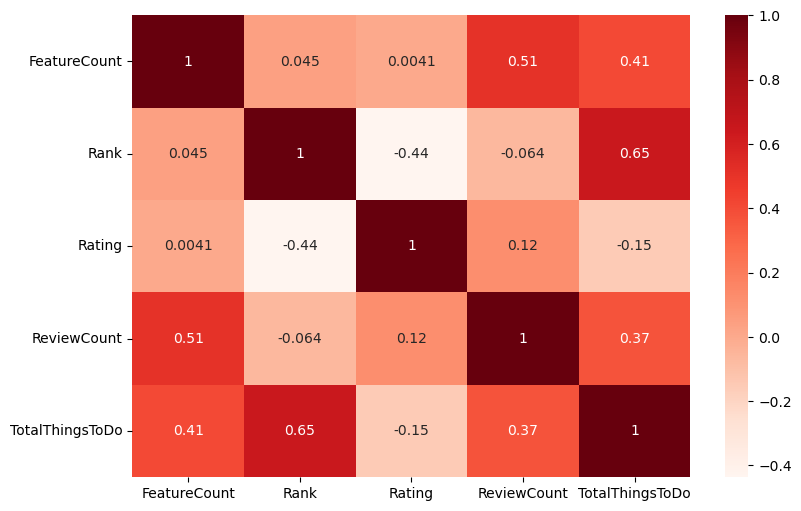

In [270]:
correlation_mat = museums.corr()

fig = plt.subplots(figsize=(9,6))
sns.heatmap(correlation_mat, annot = True, cmap='Reds')

In [271]:
data = pd.DataFrame(museums.merge(traveler_type, on='Museum_id'), columns=['Fee', 'Rating', 'State'])

fig = px.histogram(data.sort_values('Rating'), x="Fee", color="Rating")


fig.update_layout(
    title='Distribution of "Fee"',
    xaxis_title='Fee',
    yaxis_title='Frequency',
    showlegend=True,
    title_x = 0.5)

fig.show()

**The majority of museums don't have a fee.** The rating of a museum seems to have no implication on if the museum has a fee, since museums with and without fees have similar proportions of ratings.

In [272]:
# removing outliers to improve visualization
rev_data = museums.loc[museums['ReviewCount'] < 5000]['ReviewCount']
tttd_data = museums.loc[museums['TotalThingsToDo'] < 1000]['TotalThingsToDo']

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=museums['Rating'], orientation='v'), row=1, col=1)
fig.add_trace(go.Histogram(x=rev_data, orientation='v'), row=1, col=2)
fig.add_trace(go.Histogram(x=museums['FeatureCount'], orientation='v'), row=1, col=3)
fig.add_trace(go.Histogram(x=tttd_data, orientation='v'), row=1, col=4)


fig.update_layout(
    title='Distribution of some features',
    xaxis_title='Rating',
    xaxis2_title='Review Count',
    xaxis3_title='Feature Count',
    xaxis4_title='Total Things To Do',
    yaxis_title='Frequency',
    showlegend=False,
    title_x = 0.5)

# Show the figure
fig.show()


**Almost all museums' ratings are around 4-5.** The distribution of number of reviews, features and perks is right-skewed, even when removing some outliers.

In [273]:
fig = px.bar(museums['Category'].value_counts(ascending=True))

fig.update_layout(
    title={
        'text': "Museums' categories",
        'x':0.5},

    xaxis_title="Categories",
    yaxis_title="Number of museums")

fig.show()

Since most categories only got a few museums, **the museums are dominated by a few categories**, as such Art, History and Specialty museums.

Text(0, 0.5, 'Frequency')

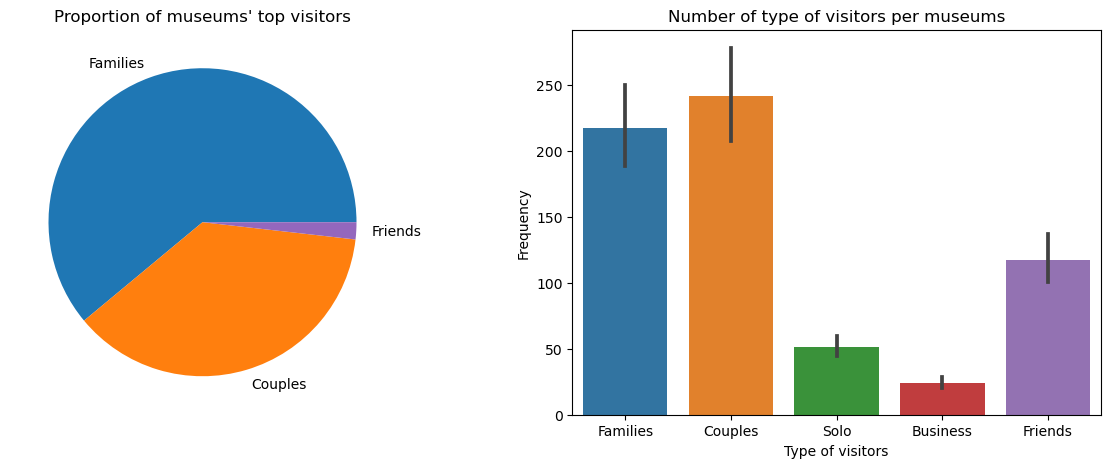

In [274]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.pie(traveler_type['Favorite'].value_counts(), labels = ['Families', 'Couples','Friends'], colors=['tab:blue','tab:orange','tab:purple'])
ax1.set_title("Proportion of museums' top visitors")
sns.barplot(data=traveler_type, ax=ax2)
ax2.set_title("Number of type of visitors per museums")
ax2.set_xlabel('Type of visitors')
ax2.set_ylabel('Frequency')

**The majority of museums' top visitors are families. However,** if we compute the total number of visitors, **there are more couples than any type of visitors.** The number of friends visiting museums also does not translate well to their proportion of museums' top visitors.

In [275]:
museums.columns

Index(['Address', 'Description', 'FeatureCount', 'Fee', 'MuseumName',
       'PhoneNum', 'Rank', 'Rating', 'ReviewCount', 'TotalThingsToDo',
       'Category', 'State'],
      dtype='object')

In [276]:
data = pd.DataFrame(museums.merge(traveler_type, on='Museum_id'), columns=['Favorite', 'State'])

fig = px.histogram(data, x="State", color="Favorite")

# getting the bars sorted by frequency
state_counts = data['State'].value_counts().sort_values(ascending=True)
fig.update_xaxes(categoryorder='array', categoryarray=state_counts.index)

fig.update_layout(
    title={
        'text': "Museums' states",
        'x':0.5},

    xaxis_title="States",
    yaxis_title="Number of museums")

fig.show()

* Florida, California, Texas and New York got the the most museums;
* States like Kansas, Michigan and Illinois are dominated by museums most visited by families;
* New Mexico, Washington and Florida museums are more prefered by couples.
* Friends seems to prefer Arkansas and Columbia (however still in a very low proportion)




---

# **II. Level 2: Advanced Topics**

**Q1 - Are there types of museums whose majority of visitors are families?**

Assumptions:
- We considered the type of museums to be the 'Category' variable.
- We refered to 'familiar' museums as the ones whose the majority of visitors are families.

To answer this question, we first thought of **simply counting the total number of each visitor type per category**, and then see which of these had a majority of familiar visitors.

However, **this approach could be defrauded if some categories had outliers museums**, that is, for instance, a category could have every museum with more family visitors, but if it had a museum with a huge number of couples visits, it would be considered a couple's category, when it would not really be.

Visual explanation:

In [277]:
pd.DataFrame(data= [ ['Museu1', 20, 12],
                          ['Museu2', 15, 6],
                          ['Museu3', 27, 60],
                          ['Museu4', 19, 15],
                          ['Total', 83, 93]], columns=['Museums', 'Family', 'Couples'])

# however 3/4 museums have families as their main visitor, this category would be considered a couples' category

,Museums,Family,Couples
0,Museu1,20,12
1,Museu2,15,6
2,Museu3,27,60
3,Museu4,19,15
4,Total,83,93


**We wanted to ensure that, if a family decided to go to a museum in a familiar category, it would probably be a familiar museum.** Given this, we preferred another approach: For each category, see how many of their museums could be considered 'familiar', that is, most of its visitors are families. After that, we would consider a category to be 'familiar' if over 50% (majority) of its museums are 'familiar'.

To answer this question we will make a dataframe with the necessary information:

In [278]:
# merging the datasets that we need to answer the question
q1data = pd.DataFrame(data=museums.merge(traveler_type, on='Museum_id'), columns=['Category',  'Favorite'])
q1data.tail()

,Category,Favorite
Museum_id,,
35,Natural History Museums,Families
79,History Museums,Couples
551,History Museums,Couples
514,Natural History Museums,Friends
553,Art Museums,Couples


Now we will extract the types of museums whose top visitors are families.

In [279]:
categories_famfreq = q1data.loc[q1data['Favorite'] == 'Families'].groupby('Category').size()
# querying to see museums whose most visitors are families
categories_famfreq

Category
Architectural Buildings           2
Art Galleries                     2
Art Museums                      14
Auto Race Tracks                  1
Bridges                           1
Children's Museums               34
Educational sites                 1
Factory Tours                     1
Historic Sites                    6
History Museums                  62
Lessons & Workshops               1
Libraries                         3
Lighthouses                       2
Military Bases & Facilities       1
Military Museums                 20
Monuments & Statues               3
National Parks                    1
Natural History Museums          33
Nature & Parks                    1
Nature & Wildlife Areas           2
Observatories & Planetariums      1
Science Museums                  24
Ships                             1
Specialty Museums               156
Tramways                          1
dtype: int64

Now, we need to see if the majority (more than 50%) of the museums in each category are familiar. Firstly, we need to get the number of museums in each category.

In [280]:
# creating a Series with the categories and the number of museums belong to them
categories_freq = q1data.groupby('Category').size()
categories_freq

Category
Architectural Buildings             4
Art Galleries                       3
Art Museums                       180
Auto Race Tracks                    1
Bridges                             1
Cemeteries                          1
Children's Museums                 34
Cultural Tours                      1
Educational sites                   5
Factory Tours                       1
Geologic Formations                 1
Gift & Specialty Shops              2
Historic Sites                     32
Historic Walking Areas              2
Historical & Heritage Tours         1
History Museums                   187
Lessons & Workshops                 1
Libraries                           9
Lighthouses                         5
Literary, Art & Music Tours         1
Lookouts                            1
Military Bases & Facilities         3
Military Museums                   37
Monuments & Statues                 3
National Parks                      1
Natural History Museums            36
Nat

Now that we already have the number of familiar and total museums in each category, we must compute the ratio between them, in order to see if there are types of museums whose majority of visitors are families.

In [281]:
familiar_ratio = categories_famfreq / categories_freq   # getting the ratio, dividing the total familiar museums for the total museums, in each category

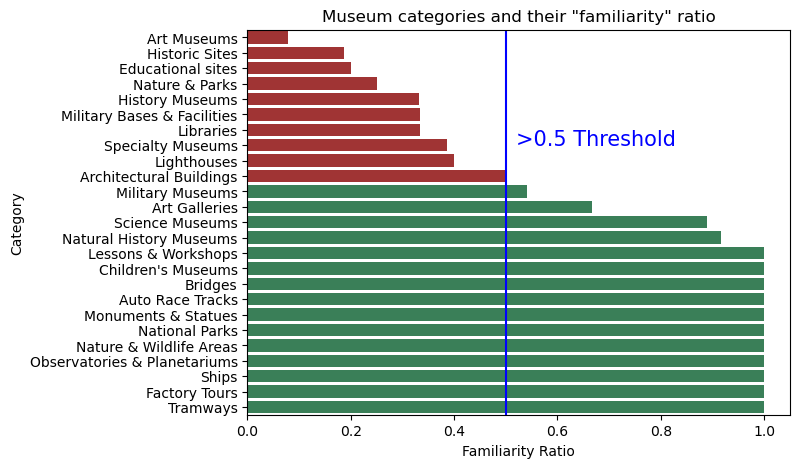

In [282]:
familiar_ratio_1 = familiar_ratio.copy()

familiar_ratio_1.dropna(inplace=True)   # dropping the ratios = 0
familiar_ratio_1.sort_values(inplace=True)   # sorting the Series by its values, to improve the visualization

categories = familiar_ratio_1.index
ratios = familiar_ratio_1.values
colors = ['seagreen' if ratio > 0.5 else 'firebrick' for ratio in ratios]

fig, axs = plt.subplots(figsize=(7, 5))
sns.barplot(x=ratios, y=categories, palette=colors)
plt.title('Museum categories and their "familiarity" ratio')
plt.xlabel('Familiarity Ratio')
plt.axvline(x=0.5, c='blue')
plt.text(0.52, y=7, s='>0.5 Threshold', c='blue', fontsize=15 )

plt.show()

In [283]:
list(familiar_ratio_1[familiar_ratio_1 > 0.5].index)   # keeping only the categories whose familiar_ratio is bigger than 0.5 (>50%)

['Military Museums',
 'Art Galleries',
 'Science Museums',
 'Natural History Museums',
 'Lessons & Workshops',
 "Children's Museums",
 'Bridges',
 'Auto Race Tracks',
 'Monuments & Statues',
 'National Parks',
 'Nature & Wildlife Areas',
 'Observatories & Planetariums',
 'Ships',
 'Factory Tours',
 'Tramways']

However, some of these categories have only a few museums.

In [284]:
categories_freq.loc[categories_freq.index.isin(list(familiar_ratio_1[familiar_ratio_1 > 0.5].index)) & (categories_freq < 10)]     # 11 of the 15 familiar categories only got 3 or less museums

Category
Art Galleries                   3
Auto Race Tracks                1
Bridges                         1
Factory Tours                   1
Lessons & Workshops             1
Monuments & Statues             3
National Parks                  1
Nature & Wildlife Areas         2
Observatories & Planetariums    1
Ships                           1
Tramways                        1
dtype: int64

This categories can still be considered familiar, since the majority of their museums are too. **Nevertheless, their reduced sample size can be misleading.** Let's try to set a minimum number of museums threshold to see if we still got familiar museums:

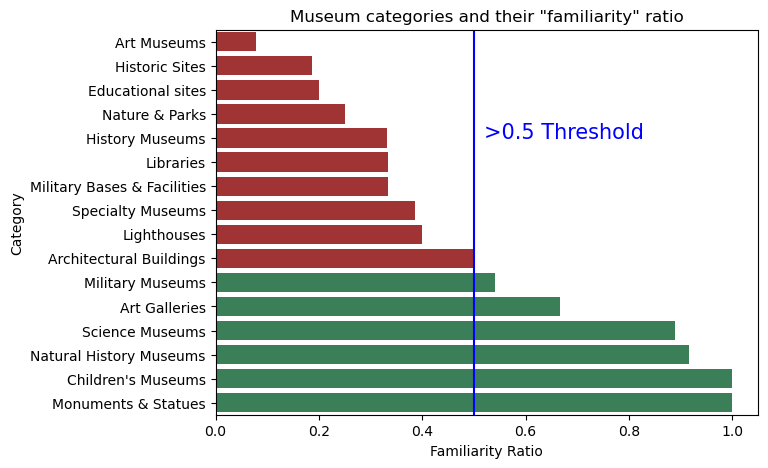

In [285]:
familiar_ratio_2 = categories_famfreq / categories_freq.loc[categories_freq >= 3]   # getting the ratio, dividing the total familiar museums for the total museums, in each category

familiar_ratio_2.dropna(inplace=True)   # dropping the ratios = 0
familiar_ratio_2.sort_values(inplace=True)   # sorting the Series by its values, to improve the visualization

categories = familiar_ratio_2.index
ratios = familiar_ratio_2.values
colors = ['seagreen' if ratio > 0.5 else 'firebrick' for ratio in ratios]

fig, axs = plt.subplots(figsize=(7, 5))
sns.barplot(x=ratios, y=categories, palette=colors)
plt.title('Museum categories and their "familiarity" ratio')
plt.xlabel('Familiarity Ratio')
plt.axvline(x=0.5, c='blue')
plt.text(0.52, y=4, s='>0.5 Threshold', c='blue', fontsize=15 )

plt.show()

With this minimum threshold, **the number of familiar categories reduced from 15 to 6.** These 6 are more safe to consider them a familiar category, given their sample size.

Let's try to see, from the 'familiar' categories, which of them still have a majority of families as their visitors:

In [286]:
total_visitors = pd.DataFrame(data=museums.loc[museums['Category'].isin(familiar_ratio_2.loc[familiar_ratio_2 > 0.5].index)].merge(traveler_type, on='Museum_id'), columns=['Category',  'Families', 'Couples', 'Solo', 'Friends', 'Business'])
total_visitors = total_visitors.groupby('Category').sum()
total_visitors['Family %'] = total_visitors['Families'] / (total_visitors['Families']+total_visitors['Couples']+total_visitors['Solo']+total_visitors['Friends']+total_visitors['Business'])
total_visitors

,Families,Couples,Solo,Friends,Business,Family %
Category,,,,,,
Art Galleries,430,336,138,285,107,0.331790
Children's Museums,8877,1223,296,866,314,0.766845
Military Museums,7695,10259,1695,4192,1019,0.309533
Monuments & Statues,586,467,130,283,96,0.375160
Natural History Museums,10969,6375,1630,3046,726,0.482239
Science Museums,6590,2786,778,1600,375,0.543326


In [287]:
total_visitors.loc[total_visitors['Family %'] > 0.5].index

Index(['Children's Museums', 'Science Museums'], dtype='object', name='Category')

From the given categories, only two of them have a majority.

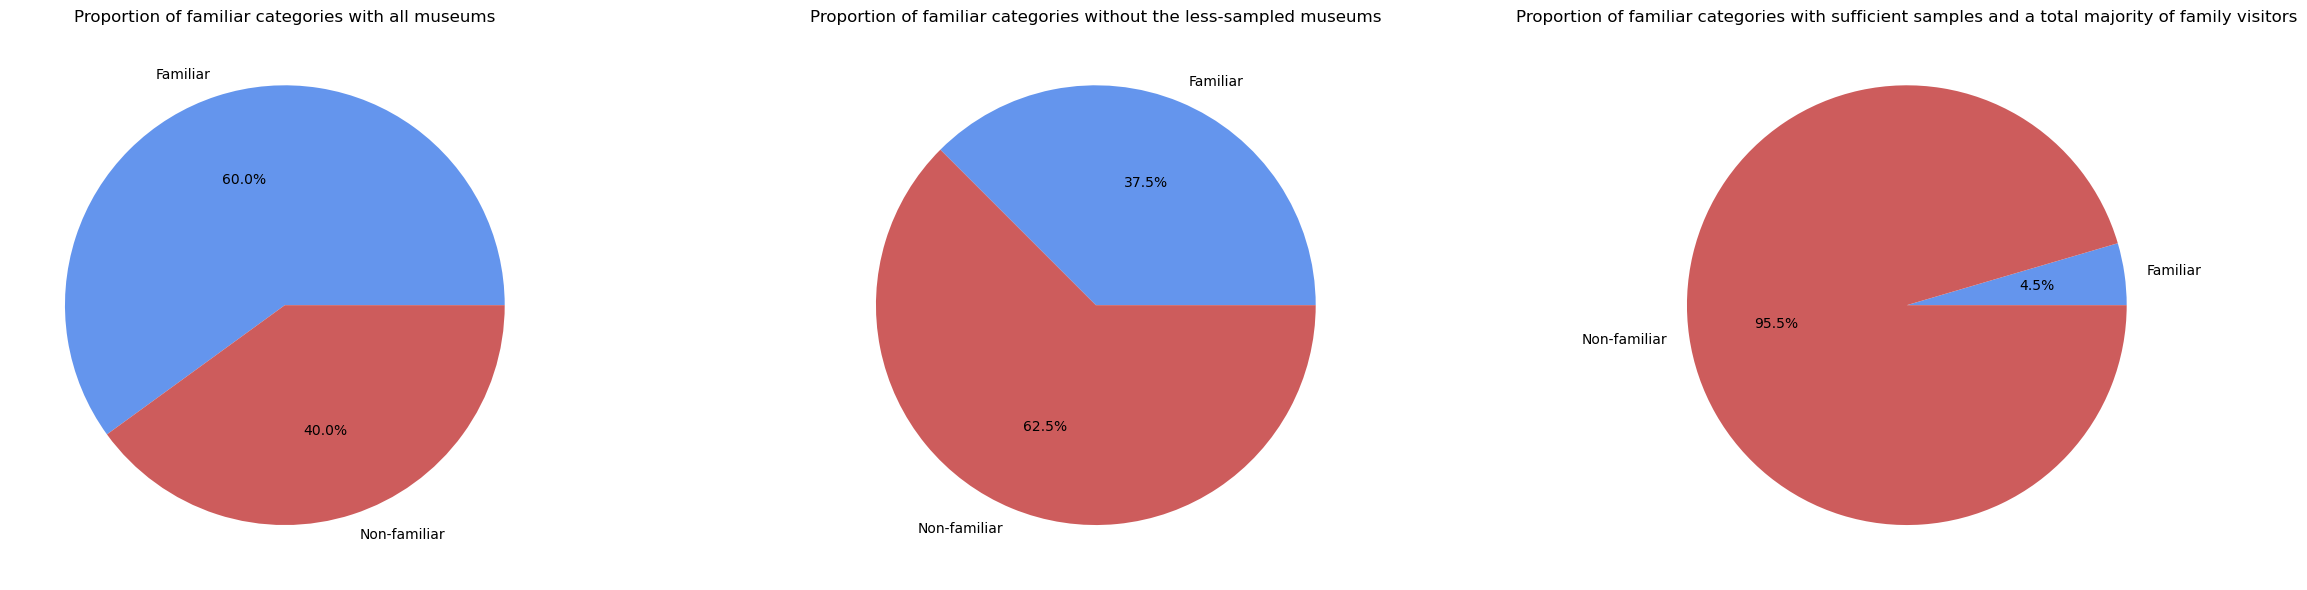

In [288]:
fig, axs = plt.subplots(1, 3, figsize=(25,6))

palette = ['cornflowerblue', 'indianred']

familiars_1 = len(familiar_ratio_1.loc[familiar_ratio_1 > 0.5])
non_familiars_1 = len(familiar_ratio_1.loc[familiar_ratio_1 <= 0.5])
axs[0].pie(x=[familiars_1, non_familiars_1], labels=['Familiar', 'Non-familiar'], colors=palette, autopct='%1.1f%%')
axs[0].set_title('Proportion of familiar categories with all museums')

familiars_2 = len(familiar_ratio_2.loc[familiar_ratio_2 > 0.5])
non_familiars_2 = len(familiar_ratio_2.loc[familiar_ratio_2 <= 0.5])
axs[1].pie(x=[familiars_2, non_familiars_2], labels=['Familiar', 'Non-familiar'], colors=palette, autopct='%1.1f%%')
axs[1].set_title('Proportion of familiar categories without the less-sampled museums')

axs[2].pie(x=[2, len(museums.groupby('Category'))], labels=['Familiar', 'Non-familiar'], colors=palette, autopct='%1.1f%%')
axs[2].set_title('Proportion of familiar categories with sufficient samples and a total majority of family visitors')

plt.tight_layout()
plt.show()

The two categories of the last piechart fit every possible standard, so they can be ultimately considered as familiar categories.

**Answer:** **Yes, there are types of museums whose majority of visitors are families.** Depending on our standards (a minimum sample size, wanting to have a majority of family visitors), we get different results for a familiar museum. Nevertheless, **Science and Children's museums and undoubtedly familiar museums.**

---

***What are the most relevant tags associated with these museums?***

**Assumptions:** We assumed that 'these museums' refered to every familiar museum, independently if their category is familiar or not. We used the list of familiar museums with less requirements.

In [289]:
q1data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 635 to 553
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1006 non-null   object
 1   Favorite  1006 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB


In [290]:
tag_cloud.info() # it has less rows than q1data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 278 to 482
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tag_1   939 non-null    object
 1   tag_2   939 non-null    object
 2   tag_3   939 non-null    object
 3   tag_4   939 non-null    object
 4   tag_5   939 non-null    object
 5   tag_6   939 non-null    object
 6   tag_7   939 non-null    object
 7   tag_8   939 non-null    object
 8   tag_9   939 non-null    object
 9   tag_10  939 non-null    object
 10  tag_11  939 non-null    object
 11  tag_12  939 non-null    object
 12  tag_13  939 non-null    object
 13  tag_14  939 non-null    object
 14  tag_15  939 non-null    object
 15  tag_16  939 non-null    object
 16  tag_17  939 non-null    object
 17  tag_18  939 non-null    object
 18  tag_19  939 non-null    object
 19  tag_20  939 non-null    object
dtypes: object(20)
memory usage: 154.1+ KB


As we can see, q1data (dataset with museums and their visitors) has more rows than tag_cloud. That means that some museums on q1data won't have a correspondent tag, since the second dataset has some missing values.

Now, we want to get the 'familiar' museums IDs:

In [291]:
familiar_ids = q1data.loc[q1data['Favorite'] == 'Families'].index

Extracting the tags from each museum we got before:

In [292]:
familiar_tags = {}    # empty dict to store the tags and its frequency
for id in familiar_ids:   # iterating over every familiar museum id

    if id in tag_cloud.index:   # condition to avoid searching an index not present in the tag dataset
        for col in tag_cloud:  # iterating over every tag
            tag = tag_cloud.loc[id][col]

            if tag not in familiar_tags.keys():   # if the tag is not already in the tag dict
                familiar_tags[tag] = 1              # add it

            else:                                 # if it is, add 1 to its frequency
                familiar_tags[tag] += 1

In [293]:
top10_tags = sorted(familiar_tags.items(), key=lambda x: x[1], reverse=True)[:10]

Text(0, 0.5, 'Frequency')

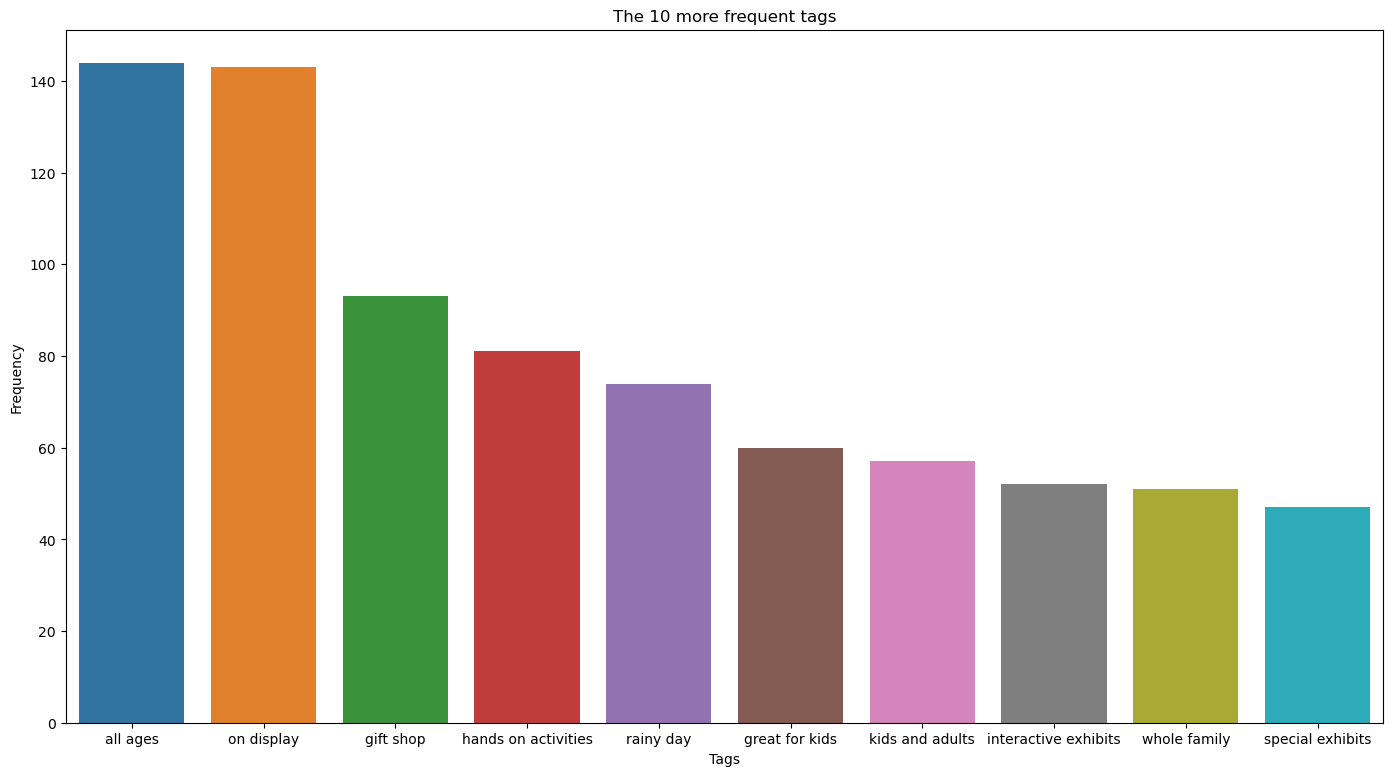

In [294]:
fig, ax = plt.subplots(figsize=(17,9))
sns.barplot(x=list(dict(top10_tags).keys()), y=list(dict(top10_tags).values()))
ax.set_title('The 10 more frequent tags')
ax.set_xlabel('Tags')
ax.set_ylabel('Frequency')

**Answer:** The most revelant tags associated to 'familiar' museums are 'all ages', 'on display' and 'gift shop'.

---

***Q2 - What are the most highly-rated museums? Where are they located?***

Assumptions: As we will see, **even if we only keep the museums with a 'perfect' rating (5), we will still have over 100 museums.** So, since the ratings of the museums are leveled on top, **we decided to only use the 'perfect' ones**, when searching for 'highly-rated' museums.

To answer this question we will extract the needed data.

In [295]:
q2data = pd.DataFrame(museums, columns=['MuseumName', 'Rating', 'State'])
q2data.head()

,MuseumName,Rating,State
Museum_id,,,
635,Newseum,4.5,DC
883,The Metropolitan Museum of Art,5.0,NY
901,The National WWII Museum,5.0,LA
202,Denver Museum of Nature & Science,4.5,CO
50,Art Institute of Chicago,5.0,IL


Now we will create a table to store the best museum in each state.

In [296]:
perfect_museums = q2data.loc[q2data['Rating']==5]
len(perfect_museums)

106

There is 106 museums with a rating of 5.

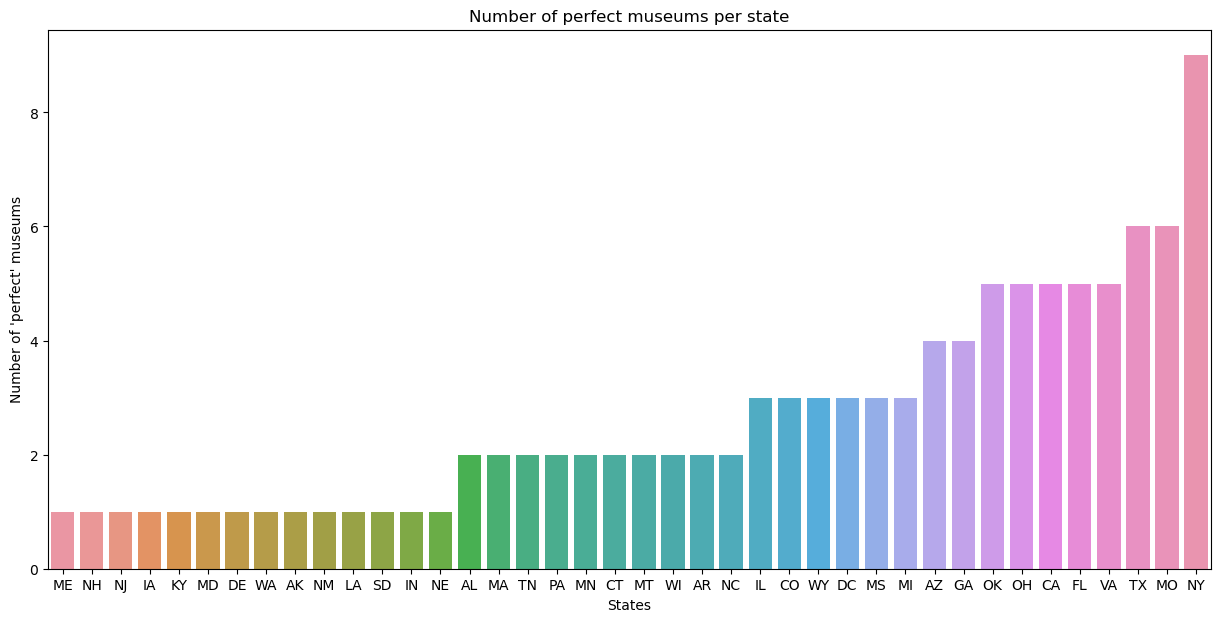

In [297]:
fig, ax = plt.subplots(figsize=(15,7))
perfect_counts = perfect_museums['State'].value_counts(ascending=True)
sns.barplot( x=perfect_counts.index, y= perfect_counts.values)
sns.color_palette("tab10")
ax.set_title("Number of perfect museums per state")
ax.set_xlabel('States')
ax.set_ylabel("Number of 'perfect' museums")
plt.show()

This bar chart shows the number of perfect museums per each state. States like New York, Texas, California and Florida have the highest number of 'perfect museums'. However, **this may be from the fact that this states have a highest number of museums.** Let's see:

Text(0.5, 1.0, "Proportion of 'perfect' museums per state")

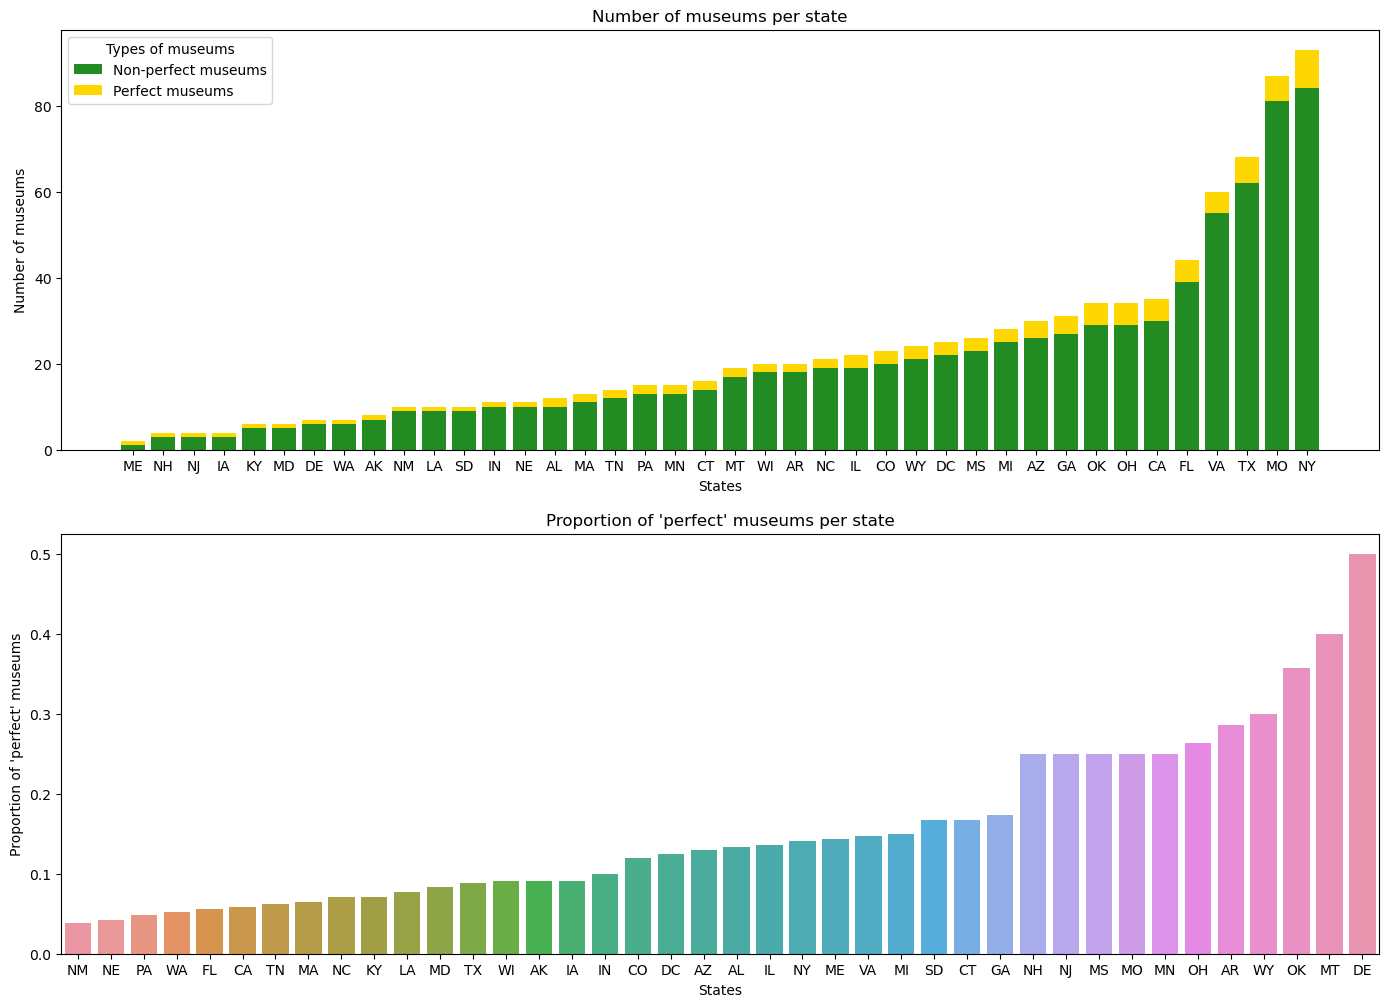

In [298]:
total_counts = q2data['State'].value_counts(ascending=True)

top = perfect_counts
top.dropna(inplace=True)
bottom = (total_counts - perfect_counts).sort_values()
bottom.dropna(inplace=True)

perfect_ratio = ( perfect_museums.groupby('State').size() /q2data.groupby('State').size() ).sort_values()
perfect_ratio.dropna(inplace=True)

fig, axs = plt.subplots(2, 1, figsize=(17,12))

axs[0].bar(perfect_counts.index, bottom, color='forestgreen', label='Non-perfect museums')
axs[0].bar(perfect_counts.index, top, bottom = bottom, color='gold', label='Perfect museums')
axs[0].set_xlabel('States')
axs[0].set_ylabel('Number of museums')
axs[0].set_title('Number of museums per state')
axs[0].legend(title='Types of museums')


sns.barplot(x=perfect_ratio.index, y=perfect_ratio.values, ax=axs[1])
axs[1].set_xlabel('States')
axs[1].set_ylabel("Proportion of 'perfect' museums")
axs[1].set_title("Proportion of 'perfect' museums per state")

As we can see, from the states mentionated above, NY is the one with the less small 'perfection' ratio, with around 15%. Excluding the states with a few number of museums (Delaware, Montana), that dominated the graphic below, we can see that there are some states with a bigger tendency to have 'perfect' museums, like Oklahoma, Ohio and Missouri.

**Answer:** The most highly-rated museums, are more located in New York and Missouri. However, if you go to a random museum on Oklahoma or Ohio, for example, you are more likely to enter in a 'perfect' museum.

---

***Q3 - How many highly-rated museums can have their rating justified by a small number of reviews?***

Assumptions:
* Since a 'small number' of reviews is a subjective matter, we decided to set a threshold to define if a museum has few or a lot of reviews;
* Now, we decided to also consider museums with a rating of 4.5, since these can also be dangerous if the sample size is not concordant.

We started by checking if the number of reviews is directly correlated with the ratings:

In [299]:
review_rating_corr = museums[['ReviewCount', 'Rating']].corr(method = 'pearson')
review_rating_corr

,ReviewCount,Rating
ReviewCount,1.00000,0.12159
Rating,0.12159,1.00000


As we can see, **the number of reviews is not correlated at all with the ratings.**

Text(0.5, 1.0, 'Number of reviews vs Rating')

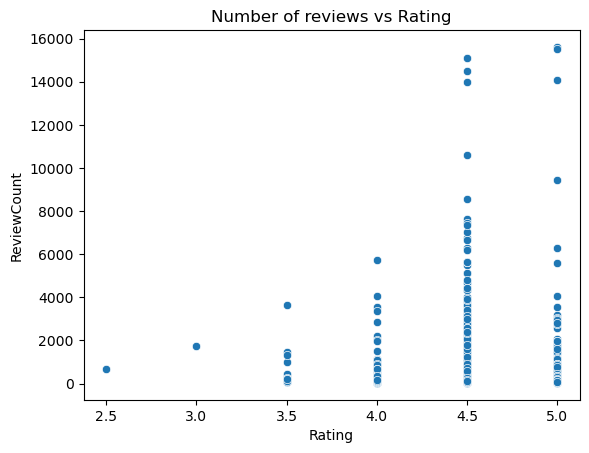

In [300]:
data = museums[museums['ReviewCount'] < 30000] # removing outliers to have a better visualization

fig, ax = plt.subplots()
sns.scatterplot(y=data['ReviewCount'], x=data['Rating'])
ax.set_title('Number of reviews vs Rating')

With this visualization, we can infere that there is a some highly rated museums with a low number of reviews.

In [301]:
q3data = pd.DataFrame(museums, columns=['Rating', 'ReviewCount'])
q3data.tail()

,Rating,ReviewCount
Museum_id,,
35,4.5,95
79,4.0,127
551,4.5,107
514,4.0,144
553,4.0,170


In [302]:
q3data['ReviewCount'].quantile(0.5)

310.5

In [303]:
q3data['ReviewCount'].mean()

906.2872763419483

Text(0.5, 1.0, "Distribution of 'ReviewCount'")

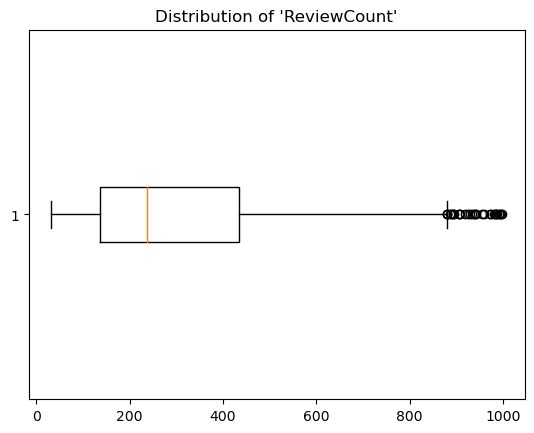

In [304]:
data = q3data.loc[q3data['ReviewCount'] < 1000, 'ReviewCount'] # filtering to have a better visualization
plt.boxplot(data, vert=False)
plt.title("Distribution of 'ReviewCount'")

**The threshold we defined is the 10th percentile of the number of reviews**, on the museums dataset. We only took the museums with less reviews than it. Thus, to be considered small, **the number of reviews should be on the 10% of museums with less reviews.**

In [305]:
q3data['ReviewCount'].quantile(0.1)

98.0

In [306]:
small_reviews = q3data.loc[q3data['ReviewCount'] < 98]
len(small_reviews)

99

In [307]:
small_reviews['Rating'].value_counts().sort_index()

3.5     2
4.0    22
4.5    70
5.0     5
Name: Rating, dtype: int64

Now, we considered to be highly rated, the museums with a rating equal or higher than 4.5, since there is a little number of perfectly rated museums.

In [308]:
hr_smallreviews = small_reviews.loc[small_reviews['Rating'] >= 4.5]
len(hr_smallreviews)

75

In [309]:
hr_smallreviews.index

Int64Index([  56,  869,  618,  973,  402,  712,  970,  485,  929,  433,  395,
             690,  555,  848,  102,  203,  417,  845,   22,   62,  123,  683,
             520,  231,  481,  951,  840,  416,  403,  982,  958,  464,  129,
             435,  912,  952,  188,  438,  163,  823,  493,  235,   47,  233,
             476,  680, 1005,  998,  362,  776,  593,  483,  714,  987,  225,
             827,  841,  838,   80,  259,  101,  430,  266,  177,  644,  398,
             300,  789,   18,  114,  410,  571,  754,  694,   35],
           dtype='int64', name='Museum_id')

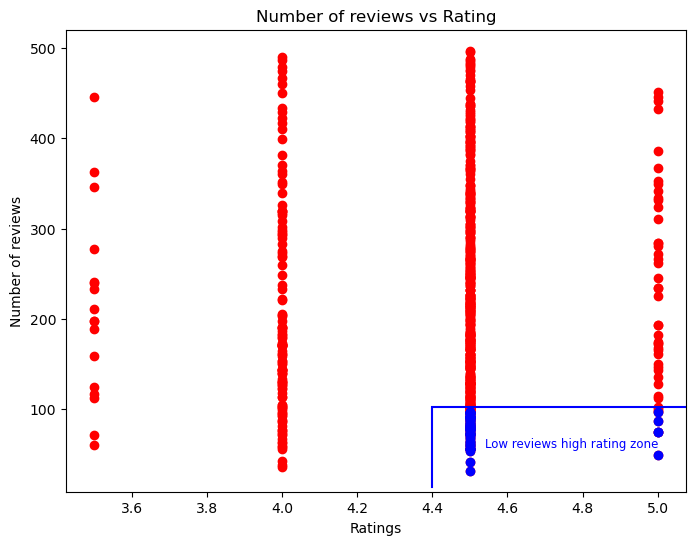

In [310]:
data = museums[museums['ReviewCount'] < 500] # removing outliers to have a better visualization
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['Rating'], data['ReviewCount'], c='r')
ax.scatter(hr_smallreviews['Rating'], hr_smallreviews['ReviewCount'], c='b')
ax.set_title('Number of reviews vs Rating')
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of reviews')
ax.axvline(4.4,0.01, 0.18, c='b')
ax.axhline(102,0.59, 1, c='b')
ax.text(4.54, 58, 'Low reviews high rating zone', fontsize=8.5, c='b')
plt.show()

**Answer:** Given our pre-defined threshold, we found 75 museums whose high rating can be justified by their small number of reviews. These museums would need a bigger sample size to prove their great ratings.

***Q4 - If a couple wants to visit a museum in New York, what would your
recommendation be?***

We started to create a dataframe with important features to our decision, such as, if the museum has a fee, its rating, the number of reviews, the number of additional perks and activities.

In [311]:
q4data = pd.DataFrame(data=museums.merge(traveler_type, on='Museum_id'), columns=['State', 'Fee', 'Rating', 'ReviewCount', 'FeatureCount', 'TotalThingsToDo', 'Favorite'])

Then, we filtered our results to only keep the museums from NY whose favorite visitor are couples, with a minimum rating of 4.5, and a trusted sample size.

In [312]:
q4data['ReviewCount'].quantile(0.9)   # getting the 90th percentile of number of reviews, a very good standard

1915.0

In [313]:
q4data = q4data.loc[( q4data['State'] == 'NY' ) & ( q4data['Favorite'] == 'Couples') & ( q4data['Rating'] >= 4.5) & (q4data['ReviewCount'] > 1915)]
q4data = q4data.drop(['State', 'Favorite'], axis=1)
q4data.head()

,Fee,Rating,ReviewCount,FeatureCount,TotalThingsToDo
Museum_id,,,,,
883,Yes,5.0,36627,12,1028
896,No,4.5,48437,5,1028
262,No,4.5,6746,3,1028
893,Yes,4.5,10591,5,1028
297,No,5.0,2588,1,1028


In [314]:
len(q4data)

12

At this point, we only got 12 museums.

Text(0.5, 1.0, 'Number of reviews vs Rating')

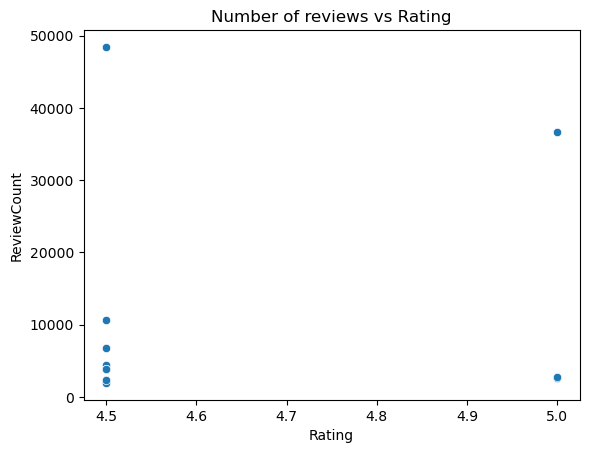

In [315]:
fig, ax = plt.subplots()
sns.scatterplot(y=q4data['ReviewCount'], x=q4data['Rating'])
ax.set_title('Number of reviews vs Rating')

With this visualization, we can see a clear candidate to our recommendation, with a 5* rating over 30000 reviews. However, before jumping to any conclusion, let's also consider the other variables.

In [316]:
(q4data.loc[(q4data['Rating']==5) & (q4data['ReviewCount'] > 10000)]).index

Int64Index([883], dtype='int64', name='Museum_id')

In [317]:
museums.loc[883] # the potential best museum

Address                   1000 5th Ave, New York City, NY 10028-0198
Description        At New York City's most visited museum and att...
FeatureCount                                                      12
Fee                                                              Yes
MuseumName                            The Metropolitan Museum of Art
PhoneNum                                                212-535-7710
Rank                                                               2
Rating                                                           5.0
ReviewCount                                                    36627
TotalThingsToDo                                                 1028
Category                              Points of Interest & Landmarks
State                                                             NY
Name: 883, dtype: object

Now, we will compute a score to evaluate how good is each museum. We will assign a weight to each variable, according to, in our opinion, how important they are to evaluate the goodness of a museum.

However, we have some variables that need scaling, like 'ReviewCount'. If we did not scale it, the score would be unbalanced since, for instance, the distance between 10000 and 40000 reviews would be much more 'heavy' to the formula than the difference between 3 and 12 activities in the museum.

Given this, we will also need to encode our categorical variable 'Fee'. It is easily encoded since it is a binary value. We will assign the 1 to 'No', and 0 to 'Yes' since we obviously prefer a free museum.

In [318]:
q4data_scl = q4data.copy()
q4data_scl['Fee'] = q4data_scl['Fee'].map({'Yes': 0, 'No': 1}) # reversed since its better to have no fee
q4data_scl

,Fee,Rating,ReviewCount,FeatureCount,TotalThingsToDo
Museum_id,,,,,
883,0,5.0,36627,12,1028
896,1,4.5,48437,5,1028
262,1,4.5,6746,3,1028
893,0,4.5,10591,5,1028
297,1,5.0,2588,1,1028
828,1,4.5,4446,3,1028
178,1,4.5,2295,0,19
882,0,4.5,3845,5,1028
981,1,4.5,1950,0,259


In [319]:
# using minmax since it has no negative values - easier to interpret
scaler = MinMaxScaler()
q4data_scl = scaler.fit_transform(q4data_scl)
q4data_scl = pd.DataFrame(q4data_scl, index=q4data.index, columns=q4data.columns)
q4data_scl

,Fee,Rating,ReviewCount,FeatureCount,TotalThingsToDo
Museum_id,,,,,
883,0.0,1.0,0.745950,1.000000,1.000000
896,1.0,0.0,1.000000,0.416667,1.000000
262,1.0,0.0,0.103169,0.250000,1.000000
893,0.0,0.0,0.185880,0.416667,1.000000
297,1.0,1.0,0.013724,0.083333,1.000000
828,1.0,0.0,0.053692,0.250000,1.000000
178,1.0,0.0,0.007421,0.000000,0.000000
882,0.0,0.0,0.040764,0.416667,1.000000
981,1.0,0.0,0.000000,0.000000,0.237859


In [320]:
# the score formula and its weights
q4data_scl['Score'] = q4data_scl['Rating']*0.3 + q4data_scl['ReviewCount']*0.3 + q4data_scl['Fee']*0.2 + q4data_scl['FeatureCount']*0.1 + q4data_scl['TotalThingsToDo']*0.1

Defining a function to color our dataframe:

In [321]:
def apply_color(val):
    if val < 0.5:
        color = '#FF0000'  
    else:
        color = '#008000'
    return 'color: %s' % color

In [322]:
q4data_scl.style.applymap(apply_color)

,Fee,Rating,ReviewCount,FeatureCount,TotalThingsToDo,Score
Museum_id,,,,,,
883,0.000000,1.000000,0.745950,1.000000,1.000000,0.723785
896,1.000000,0.000000,1.000000,0.416667,1.000000,0.641667
262,1.000000,0.000000,0.103169,0.250000,1.000000,0.355951
893,0.000000,0.000000,0.185880,0.416667,1.000000,0.197431
297,1.000000,1.000000,0.013724,0.083333,1.000000,0.612451
828,1.000000,0.000000,0.053692,0.250000,1.000000,0.341108
178,1.000000,0.000000,0.007421,0.000000,0.000000,0.202226
882,0.000000,0.000000,0.040764,0.416667,1.000000,0.153896
981,1.000000,0.000000,0.000000,0.000000,0.237859,0.223786


In [323]:
q4data['Score'] = q4data_scl['Score']
q4data = q4data.merge(museums['MuseumName'], on='Museum_id')
q4data.sort_values('Score', ascending=True, inplace=True)

In [324]:
q4data.sort_values('Score', ascending=False)

,Fee,Rating,ReviewCount,FeatureCount,TotalThingsToDo,Score,MuseumName
Museum_id,,,,,,,
883,Yes,5.0,36627,12,1028,0.723785,The Metropolitan Museum of Art
896,No,4.5,48437,5,1028,0.641667,The National 9/11 Memorial & Museum
297,No,5.0,2588,1,1028,0.612451,Ground Zero Museum Workshop
3,No,5.0,2790,0,558,0.558840,911 Ground Zero Tour
262,No,4.5,6746,3,1028,0.355951,Frick Collection
223,No,4.5,3883,4,1028,0.345808,Ellis Island
828,No,4.5,4446,3,1028,0.341108,Tenement Museum
981,No,4.5,1950,0,259,0.223786,Whitney Museum of American Art
557,No,4.5,2338,0,34,0.203991,National Baseball Hall of Fame and Museum


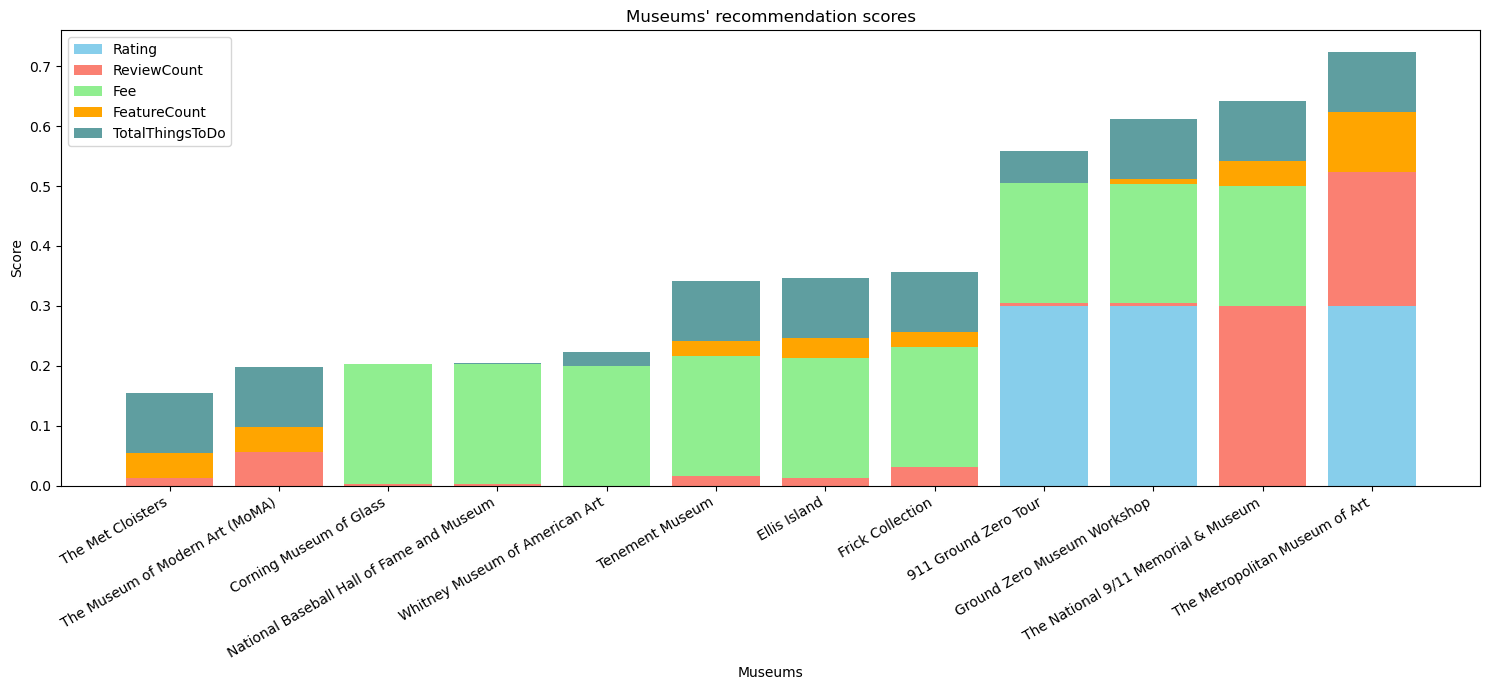

In [325]:
rat = q4data_scl.sort_values('Score')['Rating'] * 0.3
rev = q4data_scl.sort_values('Score')['ReviewCount'] * 0.3
fee = q4data_scl.sort_values('Score')['Fee'] * 0.2
feat = q4data_scl.sort_values('Score')['FeatureCount'] * 0.1
tttdo = q4data_scl.sort_values('Score')['TotalThingsToDo'] * 0.1

fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(q4data['MuseumName'], rat, color='skyblue', label='Rating')
ax.bar(q4data['MuseumName'], rev, color='salmon', bottom=rat, label='ReviewCount')
ax.bar(q4data['MuseumName'], fee, color='lightgreen', bottom=rat + rev, label='Fee')
ax.bar(q4data['MuseumName'], feat, color='orange', bottom=rat + rev + fee, label='FeatureCount')
ax.bar(q4data['MuseumName'], tttdo, color='cadetblue', bottom=rat + rev + fee + feat, label='TotalThingsToDo')

plt.title("Museums' recommendation scores")
ax.set_xlabel('Museums')
ax.set_ylabel('Score')
plt.xticks(rotation=30, ha='right')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Our initial candidate proved himself. The clear best museum is The Metropolitan Museum of Art. However, it has a fee. We will explore this below.

**Answer**: We have a clear recommendation, The Metropolitan Museum of Art. It is by miles the best museum for couples. It has a perfect score, a huge sample size, and a great number of activities and additional perks.


However, the museum has a fee, and considering how good the museum seems, it may have a huge fee. So, if you are a couple traveling on a budget and the fee of the first recommendation is unaffordable, we would suggest The National 9/11 Memorial & Museum. It has a great rating of 4.5 supported by a huge number of reviews, and good number of activities and perks, and no fee associated.

If the theme of that museum is, by any chance, somehow heavy and not adequate for your type of couple, the Ground Zero Museum Workshop is also a solid choice, with a perfect rating and over two thousand reviews, and without a fee associated.

# **III. Level 3: Data Integration**


- Public transportation
- Wealth
- Turists
- Places with more things

**Does the proximity of museums have an influence on educational outcomes or academic performance in nearby schools?**

On our first question, we integrated a dataset about the grades of the evaluation of students in New York City. We will try to see if schools with museums around have better grades, on average, and more.

In [326]:
schools = pd.read_csv('scores.csv', sep = ',', index_col=0)
schools.head()

,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
School ID,,,,,,,,,,,,,,,,,,,,,
02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,212-695-9114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,718-935-3660,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4773,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-505-0143,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%


In [327]:
schools.info() # checking for missing values

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 02M260 to 27Q323
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Name                  435 non-null    object 
 1   Borough                      435 non-null    object 
 2   Building Code                435 non-null    object 
 3   Street Address               435 non-null    object 
 4   City                         435 non-null    object 
 5   State                        435 non-null    object 
 6   Zip Code                     435 non-null    int64  
 7   Latitude                     435 non-null    float64
 8   Longitude                    435 non-null    float64
 9   Phone Number                 435 non-null    object 
 10  Start Time                   431 non-null    object 
 11  End Time                     431 non-null    object 
 12  Student Enrollment           428 non-null    float64
 13  Percent White    

Since we have some missing values in the variables 'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian', we will drop those columns, and we will delete the rows with missing values in the columns 'Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)',' Percent Tested', since those are thee most relevant columns to the problem we want to address.

In [328]:
schools.drop(['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian'], axis = 1, inplace = True) #dropping those columns
schools.info()  # checking info in the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 02M260 to 27Q323
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Name                  435 non-null    object 
 1   Borough                      435 non-null    object 
 2   Building Code                435 non-null    object 
 3   Street Address               435 non-null    object 
 4   City                         435 non-null    object 
 5   State                        435 non-null    object 
 6   Zip Code                     435 non-null    int64  
 7   Latitude                     435 non-null    float64
 8   Longitude                    435 non-null    float64
 9   Phone Number                 435 non-null    object 
 10  Start Time                   431 non-null    object 
 11  End Time                     431 non-null    object 
 12  Student Enrollment           428 non-null    float64
 13  Average Score (SA

In [329]:
# dropping the rows that contains missing values in the 'important columns'
schools = schools[~schools[['Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)','Percent Tested']].isna().any(axis=1)]
schools.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 01M539 to 27Q323
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Name                  375 non-null    object 
 1   Borough                      375 non-null    object 
 2   Building Code                375 non-null    object 
 3   Street Address               375 non-null    object 
 4   City                         375 non-null    object 
 5   State                        375 non-null    object 
 6   Zip Code                     375 non-null    int64  
 7   Latitude                     375 non-null    float64
 8   Longitude                    375 non-null    float64
 9   Phone Number                 375 non-null    object 
 10  Start Time                   374 non-null    object 
 11  End Time                     374 non-null    object 
 12  Student Enrollment           375 non-null    float64
 13  Average Score (SA

'Percent Tested' should be a float dataype.

In [330]:
schools['Percent Tested'] = schools['Percent Tested'].str.replace(r'%', '', regex=True) #here we take the '%' symbol out of the column
schools['Percent Tested'] = schools['Percent Tested'].astype('float') #we transformate into float datatype do it's easier to manipulate

In [331]:
fig = px.histogram(schools, x='Percent Tested', color='Borough')

fig.update_layout(
    title='Distribution of the percentage of tested students, per borough',
    xaxis_title='Proportion of tested students',
    yaxis_title='Frequency',
    showlegend=True,
    title_x = 0.5)

fig.show()

The majority of schools had 55-70% of their students tested. Brooklyn and Manhattan seem to have the most schools.

We considered that schools that had a percentage of test below 50% should be discarded since the sample of the SAT grades could be biased.

In [332]:
schools= schools[schools['Percent Tested']>=50.0] # setting our minimum sample threshold

In [333]:
schools[schools['Percent Tested']<50.0] # checking if the previous transformation worked

,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
School ID,,,,,,,,,,,,,,,,,


Let's transform the 'Start Time' and 'End Time' columns in a valid time format:

In [334]:
schools['Start Time'].value_counts().index

Index(['8:00 AM', '8:30 AM', '8:15 AM', '8:45 AM', '9:00 AM', '8:25 AM',
       '8:40 AM', '7:45 AM', '8:10 AM', '8:20 AM', '8:35 AM', '7:15 AM',
       '7:30 AM', '8:05 AM', '8:50 AM', '9:15 AM', '8:38 AM', '9:05 AM',
       '7:50 AM', '8:33 AM', '9:08 AM', '7:28 AM', '8:13 AM', '9:07 AM',
       '9:50 AM', '9:30 AM', '8:07 AM', '8:29 AM', '7:35 AM', '8:32 AM',
       '8:16 AM', '7:40 AM', '7:25 AM'],
      dtype='object')

In [335]:
schools['Start Time'] = pd.to_datetime(schools['Start Time'], errors='coerce')
schools['End Time'] = pd.to_datetime(schools['End Time'], errors='coerce')

schools['Total Time'] = schools['End Time'] - schools['Start Time']

In [336]:
schools.head()

,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Total Time
School ID,,,,,,,,,,,,,,,,,,
01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,2024-01-05 08:15:00,2024-01-05 16:00:00,1735.0,657.0,601.0,601.0,91.0,0 days 07:45:00
02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4773,2024-01-05 08:00:00,2024-01-05 14:45:00,358.0,395.0,411.0,387.0,78.9,0 days 06:45:00
02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-505-0143,2024-01-05 08:30:00,2024-01-05 15:00:00,383.0,418.0,428.0,415.0,65.1,0 days 06:30:00
02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4097,2024-01-05 08:00:00,2024-01-05 15:35:00,416.0,613.0,453.0,463.0,95.9,0 days 07:35:00
01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,212-406-9411,2024-01-05 08:30:00,2024-01-05 15:30:00,255.0,410.0,406.0,381.0,59.7,0 days 07:00:00


We will create a column called Total Average Score that will have the average score of all the exams.

The SAT exam (the evaluation metric we have available on the dataset) goes from 400 to 1600 (americans ¯\_(ツ)_/¯ ). It is divided in two sections: Evidence-Based Reading and Writing, and Math. Each of these goes from 200 until 800, and by summing the two we get the final score.

In the dataset imported, we got three scores - Average Score Math, Average Score Reading and Average Score Writing. So, in order to try to stay truth to their evaluation metrics, we will compute the average between Reading and Writing, and sum it to Math.

In [337]:
#Creating new column
schools['Total Average Score'] = ( (schools['Average Score (SAT Math)']+schools['Average Score (SAT Reading)'] )/2  + schools['Average Score (SAT Writing)']).round(3)
schools.tail()

,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Total Time,Total Average Score
School ID,,,,,,,,,,,,,,,,,,,
28Q687,Queens High School for the Sciences at York Co...,Queens,Q774,94-50 159th Street,Jamaica,NY,11433,40.70100,-73.79815,718-657-3181,2024-01-05 08:00:00,2024-01-05 15:18:00,426.0,701.0,621.0,625.0,97.9,0 days 07:18:00,1286.0
28Q690,High School for Law Enforcement and Public Safety,Queens,Q690,116-25 Guy R Brewer Boulevard,Jamaica,NY,11434,40.68618,-73.78408,718-977-4800,2024-01-05 08:00:00,2024-01-05 15:00:00,604.0,410.0,431.0,409.0,56.6,0 days 07:00:00,829.5
27Q309,Academy of Medical Technology (College Board),Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,11691,40.60199,-73.76283,718-471-3571,2024-01-05 08:00:00,2024-01-05 15:15:00,637.0,422.0,424.0,415.0,67.6,0 days 07:15:00,838.0
27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,11694,40.58601,-73.82309,718-634-1970,2024-01-05 08:15:00,2024-01-05 15:04:00,683.0,427.0,430.0,423.0,76.6,0 days 06:49:00,851.5
27Q323,Scholars' Academy,Queens,Q180,320 Beach 104th Street,Rockaway Park,NY,11694,40.58413,-73.82568,718-474-6918,2024-01-05 08:45:00,2024-01-05 15:00:00,1302.0,588.0,560.0,568.0,99.2,0 days 06:15:00,1142.0


Text(0.5, 1.0, 'Proportion of schools per borough')

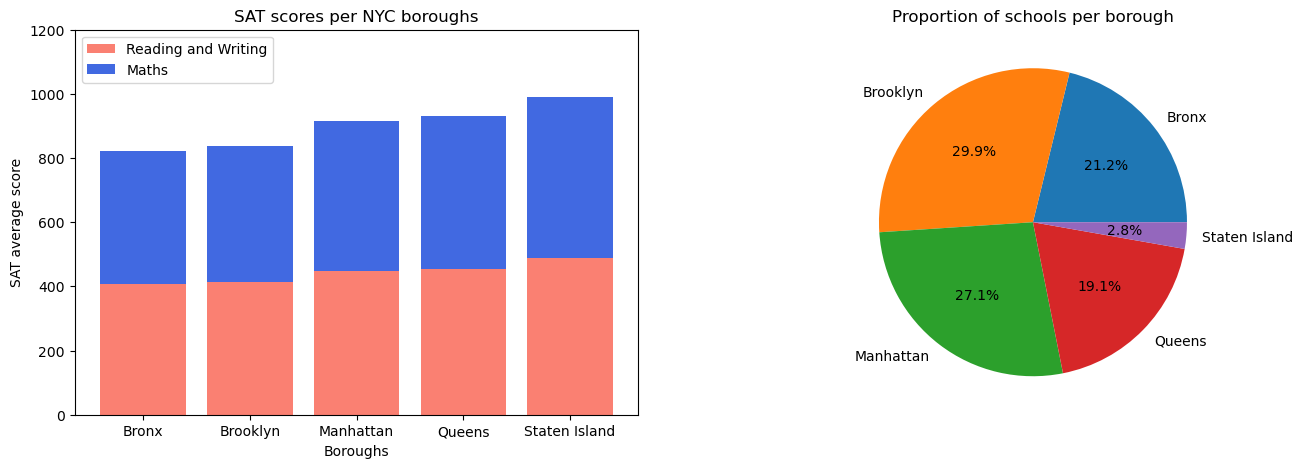

In [338]:
avg_read = schools.groupby('Borough')['Average Score (SAT Reading)'].mean()
avg_write = schools.groupby('Borough')['Average Score (SAT Writing)'].mean()
avg_ebrw = (avg_read + avg_write) / 2
avg_math = schools.groupby('Borough')['Average Score (SAT Math)'].mean()
avg_total = schools.groupby('Borough')['Total Average Score'].mean()

piedata = schools.groupby('Borough').size()

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].bar(avg_ebrw.index, avg_ebrw, color='salmon', label='Reading and Writing')
axs[0].bar(avg_ebrw.index, avg_math, color='royalblue', bottom=avg_ebrw, label='Maths')
axs[0].set_title("SAT scores per NYC boroughs")
axs[0].set_xlabel('Boroughs')
axs[0].set_ylabel('SAT average score')
axs[0].legend(loc='upper left')
axs[0].set_ylim(0, 1200) # 1600 (max score) - 400 (min score)

axs[1].pie(piedata, labels=piedata.index, autopct = '%1.1f%%')
axs[1].set_title('Proportion of schools per borough')

* We can see that the SAT scores are more or less the same across the NYC boroughs. Staten Island and Queens may have benefited of their small sample (areas with less schools -> better schools with more resources?) to have the better scores.

* We also can confirm that Manhattan and Brooklyn have the most museums.

Now, let's modify out museum dataset to be able to use geopandas:

In [339]:
didata = pd.DataFrame(museums, columns=['MuseumName', 'Address', 'State'])
didata = didata.loc[didata['State'] == 'NY']
didata.drop('State', axis=1, inplace=True)
didata.head()

,MuseumName,Address
Museum_id,,
883,The Metropolitan Museum of Art,"1000 5th Ave, New York City, NY 10028-0198"
896,The National 9/11 Memorial & Museum,"180 Greenwich St, World Trade Center, New York..."
25,American Museum of Natural History,"79th Street and Central Park West, New York Ci..."
262,Frick Collection,"1 E. 70th St., Fifth Ave., New York City, NY 1..."
893,The Museum of Modern Art (MoMA),"11 West 53rd Street, New York City, NY 10019"


In [340]:
didata['Address'] = didata['Address'].str.replace(r'-\d{4}$', '') # since we just need the 5 digit postal code for nominatim
didata.head()

,MuseumName,Address
Museum_id,,
883,The Metropolitan Museum of Art,"1000 5th Ave, New York City, NY 10028"
896,The National 9/11 Memorial & Museum,"180 Greenwich St, World Trade Center, New York..."
25,American Museum of Natural History,"79th Street and Central Park West, New York Ci..."
262,Frick Collection,"1 E. 70th St., Fifth Ave., New York City, NY 1..."
893,The Museum of Modern Art (MoMA),"11 West 53rd Street, New York City, NY 10019"


In [341]:
def get_1st_and_last(address): # here we created a function to only keep the door number, the street, name, state and 5 digits zipcode
                                    # since thats only what the golocator requires you can checked that by puting the address in the the website:
                                    # www.openstreetmap.org and identifying that pattern
    elements = address.split(',')   # spliting the address
    return elements[0] + ',' + elements[-1]  # taking only the first and last part, that are separated by commas

didata['Address'] = didata['Address'].apply(get_1st_and_last) #using oiur function in the column 'Address'

didata.head()

,MuseumName,Address
Museum_id,,
883,The Metropolitan Museum of Art,"1000 5th Ave, NY 10028"
896,The National 9/11 Memorial & Museum,"180 Greenwich St, NY 10007"
25,American Museum of Natural History,"79th Street and Central Park West, NY 10024"
262,Frick Collection,"1 E. 70th St., NY 10021"
893,The Museum of Modern Art (MoMA),"11 West 53rd Street, NY 10019"


In [342]:
locator = Nominatim(user_agent = 'projectNOVA', timeout = 10)  # creating our loctator using the opensource geolocator 'Nominatim'
                                                                # using a timeout since we are working with a online server and this avoid errors
geocode = RateLimiter (locator.geocode, min_delay_seconds = 1) # we use this to avoid overloading or abusing
                                                            # the online server of Nominatim, and in this way avoid returning errors

didata['location'] = didata['Address'].apply(geocode) # we apply the function and get the location thru the address using the geolocator
didata.head()

,MuseumName,Address,location
Museum_id,,,
883,The Metropolitan Museum of Art,"1000 5th Ave, NY 10028","(The Metropolitan Museum of Art, 1000, 5th Ave..."
896,The National 9/11 Memorial & Museum,"180 Greenwich St, NY 10007","(9/11 Memorial & Museum, 180, Greenwich Street..."
25,American Museum of Natural History,"79th Street and Central Park West, NY 10024",None
262,Frick Collection,"1 E. 70th St., NY 10021","(Frick Collection, 1, East 70th Street, Upper ..."
893,The Museum of Modern Art (MoMA),"11 West 53rd Street, NY 10019","(MoMA, 11, West 53rd Street, Manhattan Communi..."


In [343]:
# getting the latitude and longitude thruout the loaction
didata['latitude'] = didata['location'].apply(lambda loc: loc.latitude if loc else None)  # using the if statement to avoid errors if the location is not existant
didata['longitude'] = didata['location'].apply(lambda loc: loc.longitude if loc else None)

In [344]:
didata.head()

,MuseumName,Address,location,latitude,longitude
Museum_id,,,,,
883,The Metropolitan Museum of Art,"1000 5th Ave, NY 10028","(The Metropolitan Museum of Art, 1000, 5th Ave...",40.779440,-73.963382
896,The National 9/11 Memorial & Museum,"180 Greenwich St, NY 10007","(9/11 Memorial & Museum, 180, Greenwich Street...",40.711453,-74.012670
25,American Museum of Natural History,"79th Street and Central Park West, NY 10024",None,NaN,NaN
262,Frick Collection,"1 E. 70th St., NY 10021","(Frick Collection, 1, East 70th Street, Upper ...",40.771254,-73.967096
893,The Museum of Modern Art (MoMA),"11 West 53rd Street, NY 10019","(MoMA, 11, West 53rd Street, Manhattan Communi...",40.761612,-73.977499


In [345]:
didata = didata.loc[-didata['location'].isna()] # excluding the rows where the location was not obtained
didata.head()

,MuseumName,Address,location,latitude,longitude
Museum_id,,,,,
883,The Metropolitan Museum of Art,"1000 5th Ave, NY 10028","(The Metropolitan Museum of Art, 1000, 5th Ave...",40.779440,-73.963382
896,The National 9/11 Memorial & Museum,"180 Greenwich St, NY 10007","(9/11 Memorial & Museum, 180, Greenwich Street...",40.711453,-74.012670
262,Frick Collection,"1 E. 70th St., NY 10021","(Frick Collection, 1, East 70th Street, Upper ...",40.771254,-73.967096
893,The Museum of Modern Art (MoMA),"11 West 53rd Street, NY 10019","(MoMA, 11, West 53rd Street, Manhattan Communi...",40.761612,-73.977499
297,Ground Zero Museum Workshop,"420 W 14th St, NY 10014","(ASICS, 420, West 14th Street, Meatpacking Dis...",40.741279,-74.006620


In [346]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', None)  # Display full column width

if 'location' in didata.columns:
    location_column = didata['location']
    print("Location column:")
    print(location_column)
else:
    print(" 'location' column not found in the DataFrame.")

Location column:
Museum_id
883                                         (The Metropolitan Museum of Art, 1000, 5th Avenue, Upper East Side, Manhattan, New York County, City of New York, New York, 10035, United States, (40.7794396, -73.96338248033601))
896                        (9/11 Memorial & Museum, 180, Greenwich Street, Manhattan Community Board 1, Manhattan, New York County, City of New York, New York, 10007, United States, (40.711452699999995, -74.01267026823709))
262                                                   (Frick Collection, 1, East 70th Street, Upper East Side, Manhattan, New York County, City of New York, New York, 10021, United States, (40.77125355, -73.96709612136229))
893                                           (MoMA, 11, West 53rd Street, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10019, United States, (40.761612400000004, -73.97749918210806))
297                                                                (ASICS, 42

In [347]:
didata = didata[didata['location'].astype(str).str.contains('City of New York')]
didata.head()

,MuseumName,Address,location,latitude,longitude
Museum_id,,,,,
883,The Metropolitan Museum of Art,"1000 5th Ave, NY 10028","(The Metropolitan Museum of Art, 1000, 5th Avenue, Upper East Side, Manhattan, New York County, City of New York, New York, 10035, United States, (40.7794396, -73.96338248033601))",40.779440,-73.963382
896,The National 9/11 Memorial & Museum,"180 Greenwich St, NY 10007","(9/11 Memorial & Museum, 180, Greenwich Street, Manhattan Community Board 1, Manhattan, New York County, City of New York, New York, 10007, United States, (40.711452699999995, -74.01267026823709))",40.711453,-74.012670
262,Frick Collection,"1 E. 70th St., NY 10021","(Frick Collection, 1, East 70th Street, Upper East Side, Manhattan, New York County, City of New York, New York, 10021, United States, (40.77125355, -73.96709612136229))",40.771254,-73.967096
893,The Museum of Modern Art (MoMA),"11 West 53rd Street, NY 10019","(MoMA, 11, West 53rd Street, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10019, United States, (40.761612400000004, -73.97749918210806))",40.761612,-73.977499
297,Ground Zero Museum Workshop,"420 W 14th St, NY 10014","(ASICS, 420, West 14th Street, Meatpacking District, Manhattan, New York County, City of New York, New York, 10014, United States, (40.741279, -74.0066198))",40.741279,-74.006620


In [348]:
didata.drop('location', axis  = 1, inplace =True) # dropping the location column since it would not be accepted in a geodataframe
didata.head()

,MuseumName,Address,latitude,longitude
Museum_id,,,,
883,The Metropolitan Museum of Art,"1000 5th Ave, NY 10028",40.779440,-73.963382
896,The National 9/11 Memorial & Museum,"180 Greenwich St, NY 10007",40.711453,-74.012670
262,Frick Collection,"1 E. 70th St., NY 10021",40.771254,-73.967096
893,The Museum of Modern Art (MoMA),"11 West 53rd Street, NY 10019",40.761612,-73.977499
297,Ground Zero Museum Workshop,"420 W 14th St, NY 10014",40.741279,-74.006620


Now, let's create our geodataframe:

In [349]:
geometry = gpd.points_from_xy(didata.longitude, didata.latitude)  # setting the geometry using the function points_from_xy
# that creates points using the latitude and longitudes obtained previously
didata = gpd.GeoDataFrame(didata, crs = 'EPSG:4326',geometry = geometry)  # creating our geodataframe
didata.head()

,MuseumName,Address,latitude,longitude,geometry
Museum_id,,,,,
883,The Metropolitan Museum of Art,"1000 5th Ave, NY 10028",40.779440,-73.963382,POINT (-73.96338 40.77944)
896,The National 9/11 Memorial & Museum,"180 Greenwich St, NY 10007",40.711453,-74.012670,POINT (-74.01267 40.71145)
262,Frick Collection,"1 E. 70th St., NY 10021",40.771254,-73.967096,POINT (-73.96710 40.77125)
893,The Museum of Modern Art (MoMA),"11 West 53rd Street, NY 10019",40.761612,-73.977499,POINT (-73.97750 40.76161)
297,Ground Zero Museum Workshop,"420 W 14th St, NY 10014",40.741279,-74.006620,POINT (-74.00662 40.74128)


In [350]:
# plotting our map using folium

m = leafmap.Map(width = 800, height = 500) # defining the size of our map
m = didata.explore(m = m, marker_type = 'marker', marker_kwds = {'icon':folium.Icon(color = '#0E294B', icon = 'museum', prefix = 'fa')})
# creating our map and creating icons that represent the location of the museums
m.zoom_to_gdf(didata)
m

Now we will do the same for the schools dataset. Since we already have latitude and longitude in the dataset it will be easier to geocode it, and we will keep using the same geocode.

In [351]:
# transform into GeoPandas GeoDataFrame
geometry_2 = gpd.points_from_xy(schools['Longitude'], schools['Latitude']) # getting the points that the schools are located
schools = gpd.GeoDataFrame(schools, crs = 'EPSG:4326',geometry = geometry_2) # transforming into geoDataFrames
schools.head() # checking the geodataset

,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Total Time,Total Average Score,geometry
School ID,,,,,,,,,,,,,,,,,,,,
01M539,"New Explorations into Science, Technology and Math High School",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,2024-01-05 08:15:00,2024-01-05 16:00:00,1735.0,657.0,601.0,601.0,91.0,0 days 07:45:00,1230.0,POINT (-73.97943 40.71873)
02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4773,2024-01-05 08:00:00,2024-01-05 14:45:00,358.0,395.0,411.0,387.0,78.9,0 days 06:45:00,790.0,POINT (-73.98953 40.71687)
02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-505-0143,2024-01-05 08:30:00,2024-01-05 15:00:00,383.0,418.0,428.0,415.0,65.1,0 days 06:30:00,838.0,POINT (-73.98953 40.71687)
02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4097,2024-01-05 08:00:00,2024-01-05 15:35:00,416.0,613.0,453.0,463.0,95.9,0 days 07:35:00,996.0,POINT (-73.98953 40.71687)
01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,212-406-9411,2024-01-05 08:30:00,2024-01-05 15:30:00,255.0,410.0,406.0,381.0,59.7,0 days 07:00:00,789.0,POINT (-73.98526 40.71376)


In [352]:
schools[schools['geometry'].isna()] # there are no missing values in the column 'geometry'

,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Total Time,Total Average Score,geometry
School ID,,,,,,,,,,,,,,,,,,,,


In [353]:
# we needed to change the datatype of 'Total Time' into object so we could pass the df into geopandas
schools['Total Time'] = schools['Total Time'].apply(lambda x: str(x))

In [354]:
schools.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 288 entries, 01M539 to 27Q323
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   School Name                  288 non-null    object        
 1   Borough                      288 non-null    object        
 2   Building Code                288 non-null    object        
 3   Street Address               288 non-null    object        
 4   City                         288 non-null    object        
 5   State                        288 non-null    object        
 6   Zip Code                     288 non-null    int64         
 7   Latitude                     288 non-null    float64       
 8   Longitude                    288 non-null    float64       
 9   Phone Number                 288 non-null    object        
 10  Start Time                   287 non-null    datetime64[ns]
 11  End Time                     287 n

In [355]:
m = leafmap.Map(width=800, height=500)

# Explore the data and add markers to the map
m = didata.explore(
    m=m,
    marker_type='marker',
    marker_kwds={'icon': folium.Icon(color='#0E294B', icon='museum', prefix='fa')}
)

# Zoom to the extent of the data
m.zoom_to_gdf(didata)

# Add school points from the 'schools' GeoDataFrame
m.add_gdf(schools, layer_name='Schools')

# Display the map
m

In [356]:
# Changing the crs to meters in both datasets
didata.to_crs(32616, inplace=True)
schools.to_crs(32616, inplace=True)

We defined a radium of 1km around the museums. The schools within it, would be considered to be 'close' to one

In [357]:
# defining radiuses around the museums in order to seewhat schools are within those radiuses
didata['Buffer'] = didata['geometry'].buffer(1000)
didata.head(2)

,MuseumName,Address,latitude,longitude,geometry,Buffer
Museum_id,,,,,,
883,The Metropolitan Museum of Art,"1000 5th Ave, NY 10028",40.779440,-73.963382,POINT (1601395.157 4596884.648),"POLYGON ((1602395.157 4596884.648, 1602390.342 4596786.631, 1602375.943 4596689.558, 1602352.098 4596594.363, 1602319.037 4596501.965, 1602277.079 4596413.251, 1602226.627 4596329.078, 1602168.168 4596250.255, 1602102.264 4596177.541, 1602029.551 4596111.638, 1601950.728 4596053.178, 1601866.554 4596002.727, 1601777.841 4595960.769, 1601685.442 4595927.708, 1601590.248 4595903.863, 1601493.175 4595889.463, 1601395.157 4595884.648, 1601297.140 4595889.463, 1601200.067 4595903.863, 1601104.873 4595927.708, 1601012.474 4595960.769, 1600923.761 4596002.727, 1600839.587 4596053.178, 1600760.764 4596111.638, 1600688.051 4596177.541, 1600622.147 4596250.255, 1600563.688 4596329.078, 1600513.236 4596413.251, 1600471.278 4596501.965, 1600438.217 4596594.363, 1600414.372 4596689.558, 1600399.973 4596786.631, 1600395.157 4596884.648, 1600399.973 4596982.665, 1600414.372 4597079.738, 1600438.217 4597174.933, 1600471.278 4597267.331, 1600513.236 4597356.045, 1600563.688 4597440.218, 1600622.147 4597519.041, 1600688.051 4597591.755, 1600760.764 4597657.659, 1600839.587 4597716.118, 1600923.761 4597766.569, 1601012.474 4597808.528, 1601104.873 4597841.588, 1601200.067 4597865.433, 1601297.140 4597879.833, 1601395.157 4597884.648, 1601493.175 4597879.833, 1601590.248 4597865.433, 1601685.442 4597841.588, 1601777.841 4597808.528, 1601866.554 4597766.569, 1601950.728 4597716.118, 1602029.551 4597657.659, 1602102.264 4597591.755, 1602168.168 4597519.041, 1602226.627 4597440.218, 1602277.079 4597356.045, 1602319.037 4597267.331, 1602352.098 4597174.933, 1602375.943 4597079.738, 1602390.342 4596982.665, 1602395.157 4596884.648))"
896,The National 9/11 Memorial & Museum,"180 Greenwich St, NY 10007",40.711453,-74.012670,POINT (1598361.697 4588680.862),"POLYGON ((1599361.697 4588680.862, 1599356.882 4588582.845, 1599342.482 4588485.771, 1599318.637 4588390.577, 1599285.577 4588298.178, 1599243.618 4588209.465, 1599193.167 4588125.291, 1599134.708 4588046.468, 1599068.804 4587973.755, 1598996.090 4587907.851, 1598917.267 4587849.392, 1598833.094 4587798.940, 1598744.381 4587756.982, 1598651.982 4587723.921, 1598556.787 4587700.076, 1598459.714 4587685.677, 1598361.697 4587680.862, 1598263.680 4587685.677, 1598166.607 4587700.076, 1598071.412 4587723.921, 1597979.014 4587756.982, 1597890.300 4587798.940, 1597806.127 4587849.392, 1597727.304 4587907.851, 1597654.590 4587973.755, 1597588.687 4588046.468, 1597530.228 4588125.291, 1597479.776 4588209.465, 1597437.818 4588298.178, 1597404.757 4588390.577, 1597380.912 4588485.771, 1597366.512 4588582.845, 1597361.697 4588680.862, 1597366.512 4588778.879, 1597380.912 4588875.952, 1597404.757 4588971.146, 1597437.818 4589063.545, 1597479.776 4589152.258, 1597530.228 4589236.432, 1597588.687 4589315.255, 1597654.590 4589387.968, 1597727.304 4589453.872, 1597806.127 4589512.331, 1597890.300 4589562.783, 1597979.014 4589604.741, 1598071.412 4589637.802, 1598166.607 4589661.647, 1598263.680 4589676.046, 1598361.697 4589680.862, 1598459.714 4589676.046, 1598556.787 4589661.647, 1598651.982 4589637.802, 1598744.381 4589604.741, 1598833.094 4589562.783, 1598917.267 4589512.331, 1598996.090 4589453.872, 1599068.804 4589387.968, 1599134.708 4589315.255, 1599193.167 4589236.432, 1599243.618 4589152.258, 1599285.577 4589063.545, 1599318.637 4588971.146, 1599342.482 4588875.952, 1599356.882 4588778.879, 1599361.697 4588680.862))"


In [358]:
schools.set_geometry('geometry', inplace = True)
schools.geometry.name

'geometry'

In [359]:
# setting the geometry of the dataframe to the buffers to future procecess
didata.set_geometry('Buffer', inplace = True)
didata.geometry.name

'Buffer'

Now we will do a spacial join, to check what schools stay within the buffers created previously.

In [360]:
schools_within_buffers = gpd.sjoin(schools, didata[['Buffer']], how='inner', op='within')

In [361]:
schools_within_buffers.head()

,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,...,End Time,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Total Time,Total Average Score,geometry,index_right
School ID,,,,,,,,,,,,,,,,,,,,,
01M539,"New Explorations into Science, Technology and Math High School",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,...,2024-01-05 16:00:00,1735.0,657.0,601.0,601.0,91.0,0 days 07:45:00,1230.0,POINT (1601057.222 4589916.088),828
02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4773,...,2024-01-05 14:45:00,358.0,395.0,411.0,387.0,78.9,0 days 06:45:00,790.0,POINT (1600232.359 4589579.769),828
02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-505-0143,...,2024-01-05 15:00:00,383.0,418.0,428.0,415.0,65.1,0 days 06:30:00,838.0,POINT (1600232.359 4589579.769),828
02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4097,...,2024-01-05 15:35:00,416.0,613.0,453.0,463.0,95.9,0 days 07:35:00,996.0,POINT (1600232.359 4589579.769),828
01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,212-406-9411,...,2024-01-05 15:30:00,255.0,410.0,406.0,381.0,59.7,0 days 07:00:00,789.0,POINT (1600646.548 4589287.872),828


In [362]:
schools_within_buffers.drop_duplicates(subset = ['School Name'], inplace =True) # dropping the duplicates since we realised that we would have
                                                                                # some schools that would be within two buffers or more
schools_within_buffers.drop('index_right',axis = 1, inplace=True) # dropping the column index right that contains the indexes of the didata dataframe

In [363]:
schools_within_buffers.head()

,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Total Time,Total Average Score,geometry
School ID,,,,,,,,,,,,,,,,,,,,
01M539,"New Explorations into Science, Technology and Math High School",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,2024-01-05 08:15:00,2024-01-05 16:00:00,1735.0,657.0,601.0,601.0,91.0,0 days 07:45:00,1230.0,POINT (1601057.222 4589916.088)
02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4773,2024-01-05 08:00:00,2024-01-05 14:45:00,358.0,395.0,411.0,387.0,78.9,0 days 06:45:00,790.0,POINT (1600232.359 4589579.769)
02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-505-0143,2024-01-05 08:30:00,2024-01-05 15:00:00,383.0,418.0,428.0,415.0,65.1,0 days 06:30:00,838.0,POINT (1600232.359 4589579.769)
02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4097,2024-01-05 08:00:00,2024-01-05 15:35:00,416.0,613.0,453.0,463.0,95.9,0 days 07:35:00,996.0,POINT (1600232.359 4589579.769)
01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,212-406-9411,2024-01-05 08:30:00,2024-01-05 15:30:00,255.0,410.0,406.0,381.0,59.7,0 days 07:00:00,789.0,POINT (1600646.548 4589287.872)


In [364]:
# now we will get all of the schools that are not within the buffers(not close to museums)
schools_not_within_buffers = schools.merge(schools_within_buffers, on = 'School ID', how ='left', indicator =True)
schools_not_within_buffers.head()

,School Name_x,Borough_x,Building Code_x,Street Address_x,City_x,State_x,Zip Code_x,Latitude_x,Longitude_x,Phone Number_x,...,End Time_y,Student Enrollment_y,Average Score (SAT Math)_y,Average Score (SAT Reading)_y,Average Score (SAT Writing)_y,Percent Tested_y,Total Time_y,Total Average Score_y,geometry_y,_merge
School ID,,,,,,,,,,,,,,,,,,,,,
01M539,"New Explorations into Science, Technology and Math High School",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,...,2024-01-05 16:00:00,1735.0,657.0,601.0,601.0,91.0,0 days 07:45:00,1230.0,POINT (1601057.222 4589916.088),both
02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4773,...,2024-01-05 14:45:00,358.0,395.0,411.0,387.0,78.9,0 days 06:45:00,790.0,POINT (1600232.359 4589579.769),both
02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-505-0143,...,2024-01-05 15:00:00,383.0,418.0,428.0,415.0,65.1,0 days 06:30:00,838.0,POINT (1600232.359 4589579.769),both
02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4097,...,2024-01-05 15:35:00,416.0,613.0,453.0,463.0,95.9,0 days 07:35:00,996.0,POINT (1600232.359 4589579.769),both
01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,212-406-9411,...,2024-01-05 15:30:00,255.0,410.0,406.0,381.0,59.7,0 days 07:00:00,789.0,POINT (1600646.548 4589287.872),both


In [365]:
schools_not_within_buffers = schools_not_within_buffers[schools_not_within_buffers['_merge'] == 'left_only']
schools_not_within_buffers = schools_not_within_buffers.drop(columns=['_merge'])
schools_not_within_buffers = schools_not_within_buffers.rename(columns={column: column.replace('_x', '') for column in schools_not_within_buffers.columns})
columns_to_drop = [column for column in schools_not_within_buffers.columns if column.endswith('_y')]
schools_not_within_buffers = schools_not_within_buffers.drop(columns=columns_to_drop, axis=1)

schools_not_within_buffers.head()

,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Total Time,Total Average Score,geometry
School ID,,,,,,,,,,,,,,,,,,,,
01M696,Bard High School Early College,Manhattan,M097,525 East Houston Street,Manhattan,NY,10002,40.71896,-73.97607,212-995-8479,2024-01-05 09:00:00,2024-01-05 15:50:00,545.0,634.0,641.0,639.0,70.8,0 days 06:50:00,1276.5,POINT (1601338.158 4589984.685)
02M551,Urban Assembly New York Harbor School,Manhattan,M877,550 Wheeler Avenue,Manhattan,NY,10004,40.69079,-74.01976,212-458-0800,2024-01-05 08:15:00,2024-01-05 16:00:00,447.0,446.0,453.0,428.0,78.8,0 days 07:45:00,877.5,POINT (1598106.746 4586288.572)
02M416,Eleanor Roosevelt High School,Manhattan,M855,411 East 76th Street,Manhattan,NY,10021,40.77012,-73.95338,212-772-1220,2024-01-05 08:30:00,2024-01-05 15:30:00,541.0,641.0,617.0,631.0,86.0,0 days 07:00:00,1260.0,POINT (1602399.323 4595974.597)
03M415,Wadleigh Secondary School for the Performing and Visual Arts,Manhattan,M088,215 West 114th Street,Manhattan,NY,10026,40.80217,-73.95401,212-749-5800,2024-01-05 08:00:00,2024-01-05 15:45:00,445.0,381.0,401.0,392.0,52.6,0 days 07:45:00,783.0,POINT (1601805.476 4599536.896)
03M860,Frederick Douglass Academy II Secondary School,Manhattan,M088,215 West 114th Street,Manhattan,NY,10026,40.80217,-73.95401,212-865-9260,2024-01-05 08:00:00,2024-01-05 15:00:00,411.0,390.0,384.0,373.0,63.8,0 days 07:00:00,760.0,POINT (1601805.476 4599536.896)


In [366]:
print(f'The average score of the schools that are next to museums is {schools_within_buffers["Total Average Score"].mean().round(2)}')
print(f'The average score of the schools that are not next to museums is {schools_not_within_buffers["Total Average Score"].mean().round(2)}')

The average score of the schools that are next to museums is 897.42
The average score of the schools that are not next to museums is 860.27


In [367]:
print(f'The percentage of tested students of the schools that are next to museums is {schools_within_buffers["Percent Tested"].mean()}')
print(f'The percentage of tested students of the schools that are not next to museums is {schools_not_within_buffers["Percent Tested"].mean()}')

The percentage of tested students of the schools that are next to museums is 75.54347826086956
The percentage of tested students of the schools that are not next to museums is 71.38767123287671


In [368]:
print(f'The number of students of the schools that are next to museums is {schools_within_buffers["Student Enrollment"].mean()}')
print(f'The number of students of the schools that are not next to museums is {schools_not_within_buffers["Student Enrollment"].mean()}')

The number of students of the schools that are next to museums is 668.463768115942
The number of students of the schools that are not next to museums is 850.365296803653


In [369]:
schools.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 288 entries, 01M539 to 27Q323
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   School Name                  288 non-null    object  
 1   Borough                      288 non-null    object  
 2   Building Code                288 non-null    object  
 3   Street Address               288 non-null    object  
 4   City                         288 non-null    object  
 5   State                        288 non-null    object  
 6   Zip Code                     288 non-null    int64   
 7   Latitude                     288 non-null    float64 
 8   Longitude                    288 non-null    float64 
 9   Phone Number                 288 non-null    object  
 10  Start Time                   288 non-null    object  
 11  End Time                     288 non-null    object  
 12  Student Enrollment           288 non-null    float64 

Converting into timedelta again:

In [370]:
schools_not_within_buffers["Total Time"] = pd.to_timedelta(schools_not_within_buffers['Total Time'].str.split().str[-1])
schools_within_buffers["Total Time"] = pd.to_timedelta(schools_within_buffers['Total Time'].str.split().str[-1])

In [371]:
# convert the string column back to timedelta
print(f'The time spent on the schools that are next to museums is {schools_within_buffers["Total Time"].mean()}')
print(f'The time spent on the schools that are not next to museums is {schools_not_within_buffers["Total Time"].mean()}')

The time spent on the schools that are next to museums is 0 days 06:59:20.869565217
The time spent on the schools that are not next to museums is 0 days 07:02:23.119266055


In [372]:
final_data = pd.DataFrame( {'Total Average Score': [schools_within_buffers["Total Average Score"].mean(), schools_not_within_buffers["Total Average Score"].mean()],
                          'Percent Tested': [schools_within_buffers["Percent Tested"].mean(), schools_not_within_buffers["Percent Tested"].mean()],
                          'Student Enrollment': [schools_within_buffers["Student Enrollment"].mean(), schools_not_within_buffers["Student Enrollment"].mean()],
                          'Total Time': [schools_within_buffers["Total Time"].mean(), schools_not_within_buffers["Total Time"].mean()]}, index=['Close', 'Not Close'])
final_data

,Total Average Score,Percent Tested,Student Enrollment,Total Time
Close,897.420290,75.543478,668.463768,0 days 06:59:20.869565217
Not Close,860.267123,71.387671,850.365297,0 days 07:02:23.119266055


In [373]:
fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Bar(x= final_data.index, y=final_data['Total Average Score'], orientation='v'), row=1, col=1)
fig.add_trace(go.Bar(x= final_data.index,y=final_data['Percent Tested'], orientation='v'), row=1, col=2)
fig.add_trace(go.Bar(x= final_data.index,y=final_data['Student Enrollment'], orientation='v'), row=1, col=3)
fig.add_trace(go.Bar(x= final_data.index,y=final_data['Total Time'], orientation='v'), row=1, col=4)

fig.update_layout(
    title='Comparison between the schools close and not close to museums performances',
    xaxis_title='Total Average Score',
    xaxis2_title='Percent Tested',
    xaxis3_title='Student Enrollment',
    xaxis4_title='Total Time',
    yaxis_title='Frequency',
    showlegend=False,
    title_x = 0.5)

fig.update_yaxes(range=[0, 1200], row=1, col=1)  # 1600 - 400
fig.update_yaxes(range=[0, 100], row=1, col=2)  

fig.show()

By comparing the museums 'close' and not to museums, we see that:
* The schools next to museums got better grades, on average;
* Schools not close to museums have a lot more students enrolled, on average. However, fewer of their students were tested;
* Students in schools close and not close to museums spend similar time spent on the schools, on average;

So, as we can see, students within 1 kilometer of a museum tend to have better grades. Not an absurd difference, but still a good insight to take. Nevertheless, the effort and approach taken to get there was done, and on other works, it will be more worthwhile.

# **IV. Conclusion**

With this project, we reinforced our knowledge about efficiently manipulating data in order to reach our objectives. For each question, we reached the conclusion we wanted and presented clear and understandable answers, about the best museums for each particular situation. On the last level, we were able to generate some insights.

Finding an appropriate public dataset that fitted our dataset was not easy.

With a bigger availability of data, one could explore the relationship between museums and schools, from other perspectives, and on a bigger scale (data for the whole country instead of a mere city). Nevertheless, our knowledge and feasibility about Python were undoubtedly strengthened during this work.